# Data Exploration

In [1]:
import logging
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)
logging.basicConfig(level=logging.INFO)

logger = logging.getLogger('baseline')

In [2]:
import pandas as pd
# Disable warnings
pd.set_option('mode.chained_assignment', None)

from scrabu.commons import json_to_df
from scrabu.commons import files_to_df
from scrabu.commons import count_missing_values
from scrabu.commons import fill_missing_values
from scrabu.commons import create_target_columns
from scrabu.commons import remove_unused_columns

### Load the data into a dataframe

In [3]:
df = files_to_df(path='../../data')

### Are there any missing values?

In [4]:
count_missing_values(df)

,column_name,percent_missing
shipment_number,shipment_number,0.00000
crawltime,crawltime,0.00000
url,url,0.00000
datum,datum,0.00000
status,status,0.00000
ort,ort,58.43111
is_final_event,is_final_event,0.00000


Column "ort" has many missing values. We fill them with "Unbekannt"

In [5]:
df = fill_missing_values(df)

Check again if there are any missing values

In [6]:
count_missing_values(df)

,column_name,percent_missing
shipment_number,shipment_number,0.0
crawltime,crawltime,0.0
url,url,0.0
datum,datum,0.0
status,status,0.0
ort,ort,0.0
is_final_event,is_final_event,0.0


### Data Stats

In [7]:
df.shape

(5966, 7)

Number of unique shipment numbers

In [8]:
len(df.shipment_number.unique())

1144

### Investigate Data Types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 0 to 5
Data columns (total 7 columns):
shipment_number    5966 non-null object
crawltime          5966 non-null datetime64[ns, UTC]
url                5966 non-null object
datum              5966 non-null datetime64[ns, UTC]
status             5966 non-null object
ort                5966 non-null object
is_final_event     5966 non-null float64
dtypes: datetime64[ns, UTC](2), float64(1), object(4)
memory usage: 372.9+ KB


Everything regarding data types seems to be fine! No need for conversion

### Prepare data for exploration and machine learning

- Given the features "datum", "status" and "ort" we want to predict the next "datum" and hopefully also the next "status" and the next "ort"
- We create 3 new columns. "datum_next", "ort_next" and "status_next".

In [10]:
df = create_target_columns(df)

In [11]:
df.head()

,shipment_number,crawltime,url,datum,status,ort,is_final_event,status_next,ort_next,datum_next
0,00340434188193339722,2019-12-12 13:24:20+00:00,https://www.dhl.de/int-verfolgen/search?langua...,2019-11-29 15:27:00+00:00,Die Sendung wurde elektronisch angeku00FCndigt...,Unbekannt,0.0,Die Sendung wurde von DHL bearbeitet und wird ...,Hamburg,2019-11-30 14:04:00
1,00340434188193339722,2019-12-12 13:24:20+00:00,https://www.dhl.de/int-verfolgen/search?langua...,2019-11-30 14:04:00+00:00,Die Sendung wurde von DHL bearbeitet und wird ...,Hamburg,0.0,Die Sendung ist in der Region des Empfu00E4nge...,Gu00FCnzburg,2019-12-02 21:11:00
2,00340434188193339722,2019-12-12 13:24:20+00:00,https://www.dhl.de/int-verfolgen/search?langua...,2019-12-02 21:11:00+00:00,Die Sendung ist in der Region des Empfu00E4nge...,Gu00FCnzburg,0.0,Die Sendung wurde in das Zustellfahrzeug gelad...,Unbekannt,2019-12-03 08:33:00
3,00340434188193339722,2019-12-12 13:24:20+00:00,https://www.dhl.de/int-verfolgen/search?langua...,2019-12-03 08:33:00+00:00,Die Sendung wurde in das Zustellfahrzeug gelad...,Unbekannt,0.0,Die Sendung wurde erfolgreich zugestellt.,Unbekannt,2019-12-03 11:28:00
4,00340434188193339722,2019-12-12 13:24:20+00:00,https://www.dhl.de/int-verfolgen/search?langua...,2019-12-03 11:28:00+00:00,Die Sendung wurde erfolgreich zugestellt.,Unbekannt,1.0,SuccessDelivery,SuccessDelivery,2019-12-13 00:00:00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 0 to 5
Data columns (total 10 columns):
shipment_number    5966 non-null object
crawltime          5966 non-null datetime64[ns, UTC]
url                5966 non-null object
datum              5966 non-null datetime64[ns, UTC]
status             5966 non-null object
ort                5966 non-null object
is_final_event     5966 non-null float64
status_next        5966 non-null object
ort_next           5966 non-null object
datum_next         5966 non-null datetime64[ns]
dtypes: datetime64[ns, UTC](2), datetime64[ns](1), float64(1), object(6)
memory usage: 512.7+ KB


### Data Stats

In [13]:
count_missing_values(df)

,column_name,percent_missing
shipment_number,shipment_number,0.0
crawltime,crawltime,0.0
url,url,0.0
datum,datum,0.0
status,status,0.0
ort,ort,0.0
is_final_event,is_final_event,0.0
status_next,status_next,0.0
ort_next,ort_next,0.0
datum_next,datum_next,0.0


In [14]:
df.shape

(5966, 10)

Number of unique shipment numbers

In [15]:
len(df.shipment_number.unique())

1144

In [16]:
len(df.status.unique())

29

In [17]:
len(df.ort.unique())

109

### How many different final delivery states exist?

In [18]:
final_delivery_states = df.groupby(['shipment_number']).tail(1)[["status"]]["status"].unique()
print(final_delivery_states)

['Die Sendung wurde erfolgreich zugestellt.'
 'Die Sendung wird zur Abholung in die ... gebracht. Die fru00FChestmu00F6gliche Uhrzeit der Abholung kann der Benachrichtigung entnommen werden.'
 'Die Sendung wurde von DHL bearbeitet und wird fu00FCr den Weitertransport in die Region des Empfu00E4ngers vorbereitet.'
 'Die Sendung wurde in das Zustellfahrzeug geladen. Die Zustellung erfolgt voraussichtlich heute.'
 'Die Sendung wird zur Abholung in die ... gebracht. Fu00FCr die Abholung ist neben der Benachrichtigung die Vorlage Ihres Ausweises sowie ggf. eine Vollmacht erforderlich.'
 'Die Sendung konnte nicht zugestellt werden und wird in eine Packstation gebracht.'
 'Die Sendung ist in der Region des Empfu00E4ngers angekommen und wird im nu00E4chsten Schritt zur Zustellbasis transportiert.'
 'Die Sendung konnte nicht zugestellt werden und wird in die Filiale gebracht. Fu00FCr die Abholung ist neben der Benachrichtigung die Vorlage Ihres Ausweises sowie ggf. eine Vollmacht erforderlich.'

### How many different initial delivery states exist?

In [19]:
initial_delivery_states = df.groupby(['shipment_number']).head(1)[["status"]]["status"].unique()
print(initial_delivery_states)

['Die Sendung wurde elektronisch angeku00FCndigt. Sobald die Sendung von uns bearbeitet wurde, erhalten Sie weitere Informationen.']


### Distribution of final delivery states

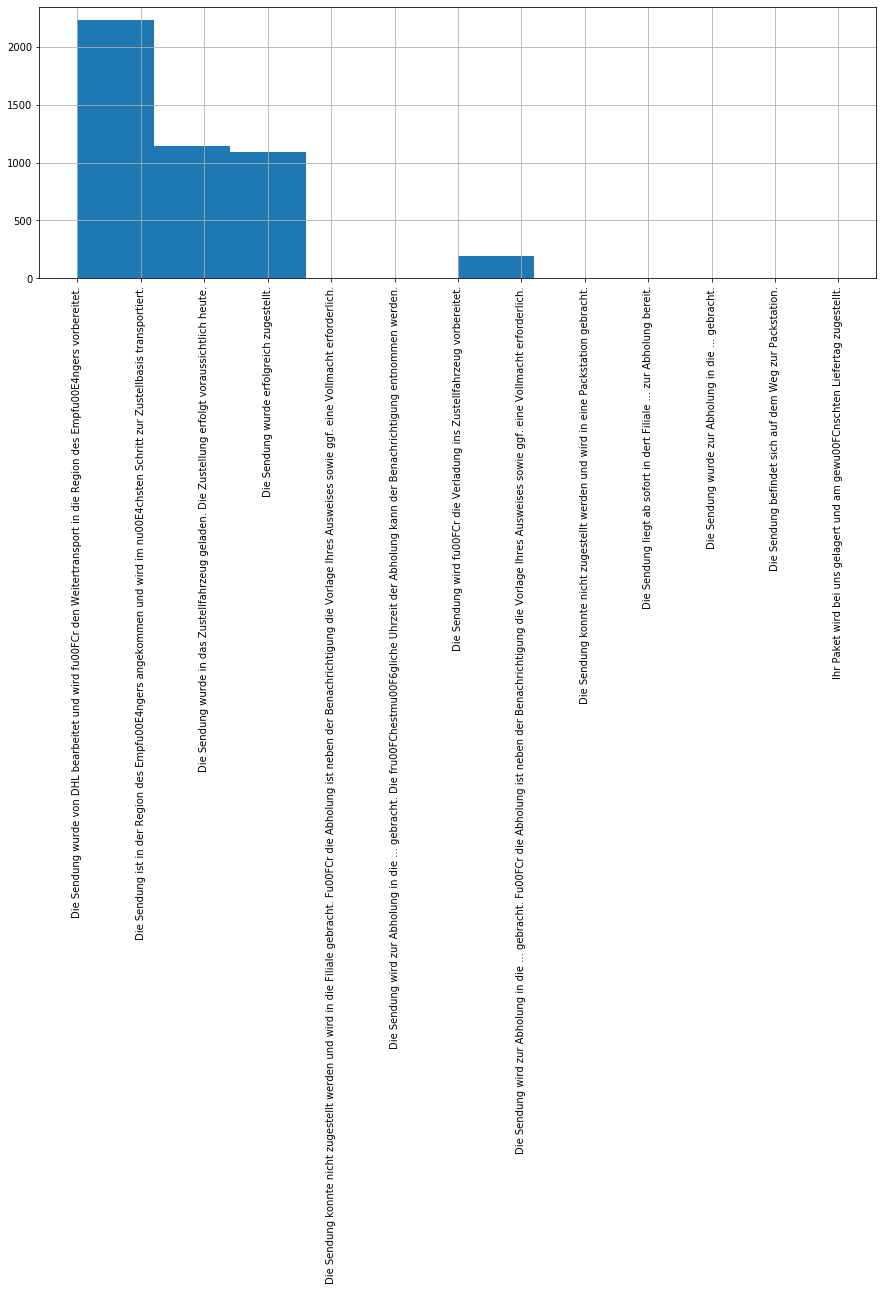

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xticks(rotation='vertical')

df[df["status"].isin(final_delivery_states)]["status"].hist(figsize=(15,5))

### Distribution of initial states

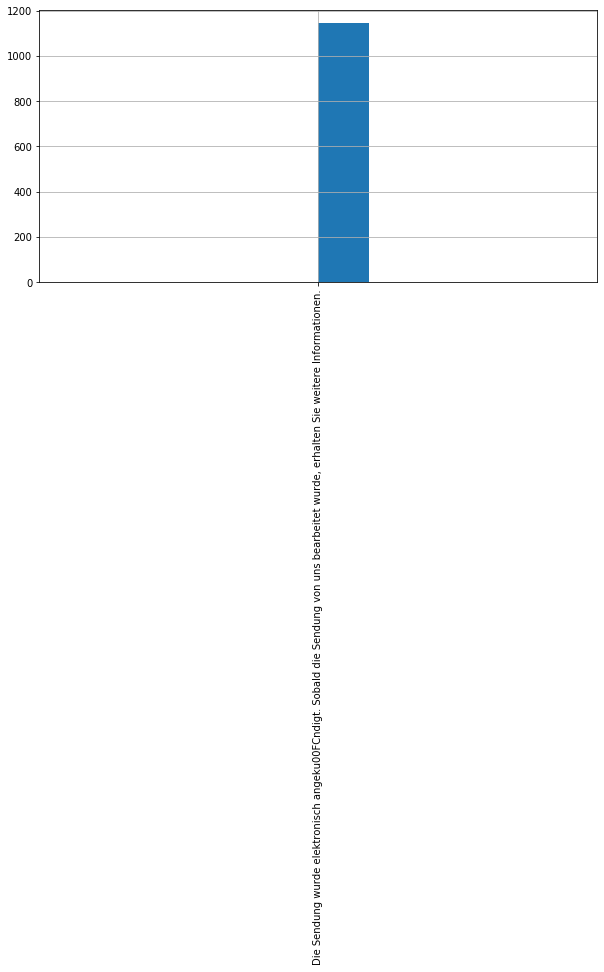

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xticks(rotation='vertical')

df[df["status"].isin(initial_delivery_states)]["status"].hist(figsize=(10,5))

### Distribution of all states

These are the most common states

In [22]:
pd.DataFrame(df["status"].value_counts()).head(10)

,status
Die Sendung wurde in das Zustellfahrzeug geladen. Die Zustellung erfolgt voraussichtlich heute.,1145
"Die Sendung wurde elektronisch angeku00FCndigt. Sobald die Sendung von uns bearbeitet wurde, erhalten Sie weitere Informationen.",1144
Die Sendung wurde von DHL bearbeitet und wird fu00FCr den Weitertransport in die Region des Empfu00E4ngers vorbereitet.,1133
Die Sendung ist in der Region des Empfu00E4ngers angekommen und wird im nu00E4chsten Schritt zur Zustellbasis transportiert.,1100
Die Sendung wurde erfolgreich zugestellt.,1089
Die Sendung wird fu00FCr die Verladung ins Zustellfahrzeug vorbereitet.,188
Die Sendung wird fu00FCr den Weitertransport vorbereitet.,48
Die Zustellung an einen gewu00FCnschten Ablageort/Nachbarn wurde gewu00E4hlt.,40
"Leider war eine Zustellung der Sendung heute nicht mu00F6glich. Mu00F6gliche Gru00FCnde: Abbruch der Zustelltour aufgrund von Krankheit, Unfall, u00DCberschreitung der Arbeitszeit. Wir versuchen es am nu00E4chsten Werktag.",14
Die Sendung wurde leider fehlgeleitet. Gegebenenfalls verzu00F6gert sich dadurch die Zustellung.,10


These are the least common states. What we see here is that there are some states that are basically the same and the following pattern:

"Die Sendung liegt in der ........ zur Abholung bereit"

But the address is each time different. This leads to too many states, which also makes machine learning hard. We ignore the address part and convert all these states to a single one.

In [23]:
pd.DataFrame(df["status"].value_counts()).tail(10)

,status
Die Sendung wird zur Abholung in die ... gebracht. Fu00FCr die Abholung ist neben der Benachrichtigung die Vorlage Ihres Ausweises sowie ggf. eine Vollmacht erforderlich.,2
Ihr Paket wird bei uns gelagert und am gewu00FCnschten Liefertag zugestellt.,2
Die Sendung befindet sich in der Zustellbasis und wird fu00FCr die Auslieferung vorbereitet.,2
Die Sendung befindet sich auf dem Weg zur Packstation.,2
Die Sendung liegt ab sofort in dert Filiale ... zur Abholung bereit.,1
Leider war eine Zustellung Ihrer Sendung heute nicht mu00F6glich. Wir versuchen es am nu00E4chsten Werktag.,1
"Die Sendung befindet sich wie gewu00FCnscht auf dem Weg zur Filiale. Sie werden informiert, sobald die Sendung in der Filiale eingetroffen ist.",1
Der gewu00FCnschte Liefertag wurde storniert oder kann aus betrieblichen Gru00FCnden leider nicht beru00FCcksichtigt werden.,1
Die Sendung wurde zur Abholung in die ... gebracht.,1
Die geringfu00FCgig beschu00E4digte Sendung wurde nachverpackt und wird jetzt zum Empfu00E4nger transportiert,1


In [24]:
pd.DataFrame(df["status"].value_counts()).head(10)

,status
Die Sendung wurde in das Zustellfahrzeug geladen. Die Zustellung erfolgt voraussichtlich heute.,1145
"Die Sendung wurde elektronisch angeku00FCndigt. Sobald die Sendung von uns bearbeitet wurde, erhalten Sie weitere Informationen.",1144
Die Sendung wurde von DHL bearbeitet und wird fu00FCr den Weitertransport in die Region des Empfu00E4ngers vorbereitet.,1133
Die Sendung ist in der Region des Empfu00E4ngers angekommen und wird im nu00E4chsten Schritt zur Zustellbasis transportiert.,1100
Die Sendung wurde erfolgreich zugestellt.,1089
Die Sendung wird fu00FCr die Verladung ins Zustellfahrzeug vorbereitet.,188
Die Sendung wird fu00FCr den Weitertransport vorbereitet.,48
Die Zustellung an einen gewu00FCnschten Ablageort/Nachbarn wurde gewu00E4hlt.,40
"Leider war eine Zustellung der Sendung heute nicht mu00F6glich. Mu00F6gliche Gru00FCnde: Abbruch der Zustelltour aufgrund von Krankheit, Unfall, u00DCberschreitung der Arbeitszeit. Wir versuchen es am nu00E4chsten Werktag.",14
Die Sendung wurde leider fehlgeleitet. Gegebenenfalls verzu00F6gert sich dadurch die Zustellung.,10


In [25]:
pd.DataFrame(df["status"].value_counts()).tail(10)

,status
Die Sendung wird zur Abholung in die ... gebracht. Fu00FCr die Abholung ist neben der Benachrichtigung die Vorlage Ihres Ausweises sowie ggf. eine Vollmacht erforderlich.,2
Ihr Paket wird bei uns gelagert und am gewu00FCnschten Liefertag zugestellt.,2
Die Sendung befindet sich in der Zustellbasis und wird fu00FCr die Auslieferung vorbereitet.,2
Die Sendung befindet sich auf dem Weg zur Packstation.,2
Die Sendung liegt ab sofort in dert Filiale ... zur Abholung bereit.,1
Leider war eine Zustellung Ihrer Sendung heute nicht mu00F6glich. Wir versuchen es am nu00E4chsten Werktag.,1
"Die Sendung befindet sich wie gewu00FCnscht auf dem Weg zur Filiale. Sie werden informiert, sobald die Sendung in der Filiale eingetroffen ist.",1
Der gewu00FCnschte Liefertag wurde storniert oder kann aus betrieblichen Gru00FCnden leider nicht beru00FCcksichtigt werden.,1
Die Sendung wurde zur Abholung in die ... gebracht.,1
Die geringfu00FCgig beschu00E4digte Sendung wurde nachverpackt und wird jetzt zum Empfu00E4nger transportiert,1


In [26]:
len(df["status"].unique())

29

In [27]:
len(df["status_next"].unique())

29

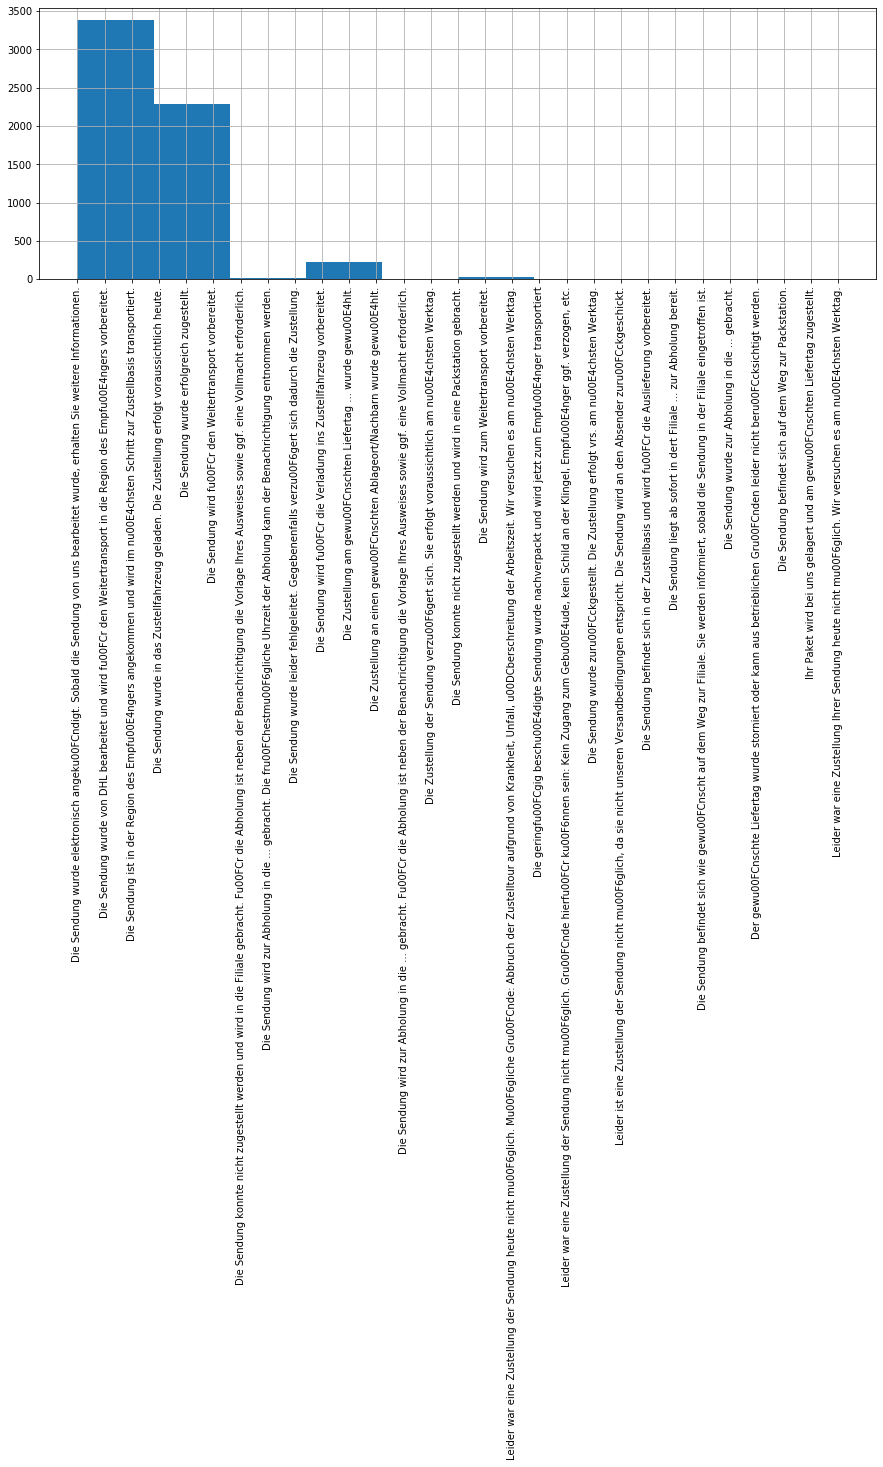

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xticks(rotation='vertical')
df["status"].hist(figsize=(15,5))

We introduces two new states to status_next: SuccessDelivery, FailedDelivery

### Distribution of the locations

In [29]:
len(df["ort"].unique())

109

In [30]:
pd.DataFrame(df["ort"].value_counts()).head(5)

,ort
Unbekannt,3486
Hamburg,1125
Neumu00FCnster,75
Ku00F6ln,58
Hagen,56


In [31]:
pd.DataFrame(df["ort"].value_counts()).tail(5)

,ort
Erlangen MechZB,1
Neu-Ulm,1
Aschheim MechZB,1
Kassel MechZB,1
Freiburg MechZB,1


Notice: One idea here could be to merge some locations. 

### Remove unused columns

In [32]:
df = remove_unused_columns(df)

In [33]:
df.head()

,shipment_number,datum,status,ort,is_final_event,status_next,ort_next,datum_next
0,00340434188193339722,2019-11-29 15:27:00+00:00,Die Sendung wurde elektronisch angeku00FCndigt...,Unbekannt,0.0,Die Sendung wurde von DHL bearbeitet und wird ...,Hamburg,2019-11-30 14:04:00
1,00340434188193339722,2019-11-30 14:04:00+00:00,Die Sendung wurde von DHL bearbeitet und wird ...,Hamburg,0.0,Die Sendung ist in der Region des Empfu00E4nge...,Gu00FCnzburg,2019-12-02 21:11:00
2,00340434188193339722,2019-12-02 21:11:00+00:00,Die Sendung ist in der Region des Empfu00E4nge...,Gu00FCnzburg,0.0,Die Sendung wurde in das Zustellfahrzeug gelad...,Unbekannt,2019-12-03 08:33:00
3,00340434188193339722,2019-12-03 08:33:00+00:00,Die Sendung wurde in das Zustellfahrzeug gelad...,Unbekannt,0.0,Die Sendung wurde erfolgreich zugestellt.,Unbekannt,2019-12-03 11:28:00
4,00340434188193339722,2019-12-03 11:28:00+00:00,Die Sendung wurde erfolgreich zugestellt.,Unbekannt,1.0,SuccessDelivery,SuccessDelivery,2019-12-13 00:00:00


### Distribution of event times

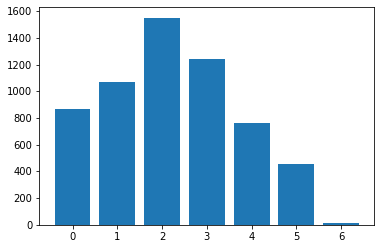

In [34]:
counts = df['datum'].dt.dayofweek.value_counts(sort=False)
plt.bar(counts.index,counts)
plt.show()

We see in the above plot which days of the week have the highest amount of events. Sunday has for example the least amount of events, as expected.

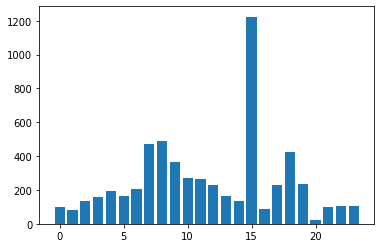

In [35]:
counts = df['datum'].dt.hour.value_counts(sort=False)
plt.bar(counts.index,counts)
plt.show()

In the above plot we see the distribution of the events over 24 hours of a day

### Time diff between events

In [36]:
from scrabu.commons import add_time_diff_column
df = add_time_diff_column(df)

Notice that for is_final_event=1, the datum_diff does not make any sense. Do not use it in the analysis

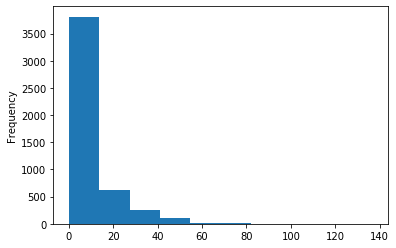

In [37]:
df[df["is_final_event"] == 0]['datum_diff'].astype('timedelta64[h]').plot.hist()

We observe two interesting things here. There are events with zero time diff and there are events with very big time diffs.

### Events with very small time diffs

In [38]:
df[(df["is_final_event"] == 0.0) & (df['datum_diff'].astype('timedelta64[s]') == 0)] 

,shipment_number,datum,status,ort,is_final_event,status_next,ort_next,datum_next,datum_diff
1,00340434188193341114,2019-12-02 19:06:00+00:00,Die Sendung wurde von DHL bearbeitet und wird ...,Hamburg,0.0,Die Zustellung am gewu00FCnschten Liefertag .....,Unbekannt,2019-12-02 19:06:00+00:00,0 days
3,00340434188193342098,2019-12-05 11:37:00+00:00,Die Sendung wurde in das Zustellfahrzeug gelad...,Unbekannt,0.0,Die Sendung wurde erfolgreich zugestellt.,Unbekannt,2019-12-05 11:37:00+00:00,0 days
3,00340434188193343163,2019-12-06 14:35:00+00:00,Die Sendung wurde in das Zustellfahrzeug gelad...,Unbekannt,0.0,Die Sendung wurde erfolgreich zugestellt.,Unbekannt,2019-12-06 14:35:00+00:00,0 days
3,00340434188193345693,2019-12-12 12:08:00+00:00,Die Sendung wurde in das Zustellfahrzeug gelad...,Unbekannt,0.0,Die Sendung befindet sich wie gewu00FCnscht au...,Unbekannt,2019-12-12 12:08:00+00:00,0 days
4,00340434188193346041,2019-12-12 07:50:00+00:00,Die Sendung wurde in das Zustellfahrzeug gelad...,Unbekannt,0.0,Die Sendung befindet sich auf dem Weg zur Pack...,Unbekannt,2019-12-12 07:50:00+00:00,0 days
3,00340434188193339081,2019-11-29 08:01:00+00:00,Die Sendung wurde in das Zustellfahrzeug gelad...,Unbekannt,0.0,Die Sendung befindet sich auf dem Weg zur Pack...,Unbekannt,2019-11-29 08:01:00+00:00,0 days


### Events with huge time diffs

In [39]:
df[(df["is_final_event"] == 0.0) & (df['datum_diff'].astype('timedelta64[h]') > 150)] 

,shipment_number,datum,status,ort,is_final_event,status_next,ort_next,datum_next,datum_diff


### Distribution of time diff for various states

In [40]:
from scrabu.commons import add_time_diff_in_hours
df = add_time_diff_in_hours(df)

In [41]:
df_temp = df[df["is_final_event"] == 0][["datum_diff_h", "status"]]
df_temp.reset_index()
df_temp.index = range(0,df_temp.shape[0])
df_temp.head()

,datum_diff_h,status
0,22.0,Die Sendung wurde elektronisch angeku00FCndigt...
1,55.0,Die Sendung wurde von DHL bearbeitet und wird ...
2,11.0,Die Sendung ist in der Region des Empfu00E4nge...
3,2.0,Die Sendung wurde in das Zustellfahrzeug gelad...
4,3.0,Die Sendung wurde elektronisch angeku00FCndigt...


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  This is separate from the ipykernel package so we can avoid doing imports until


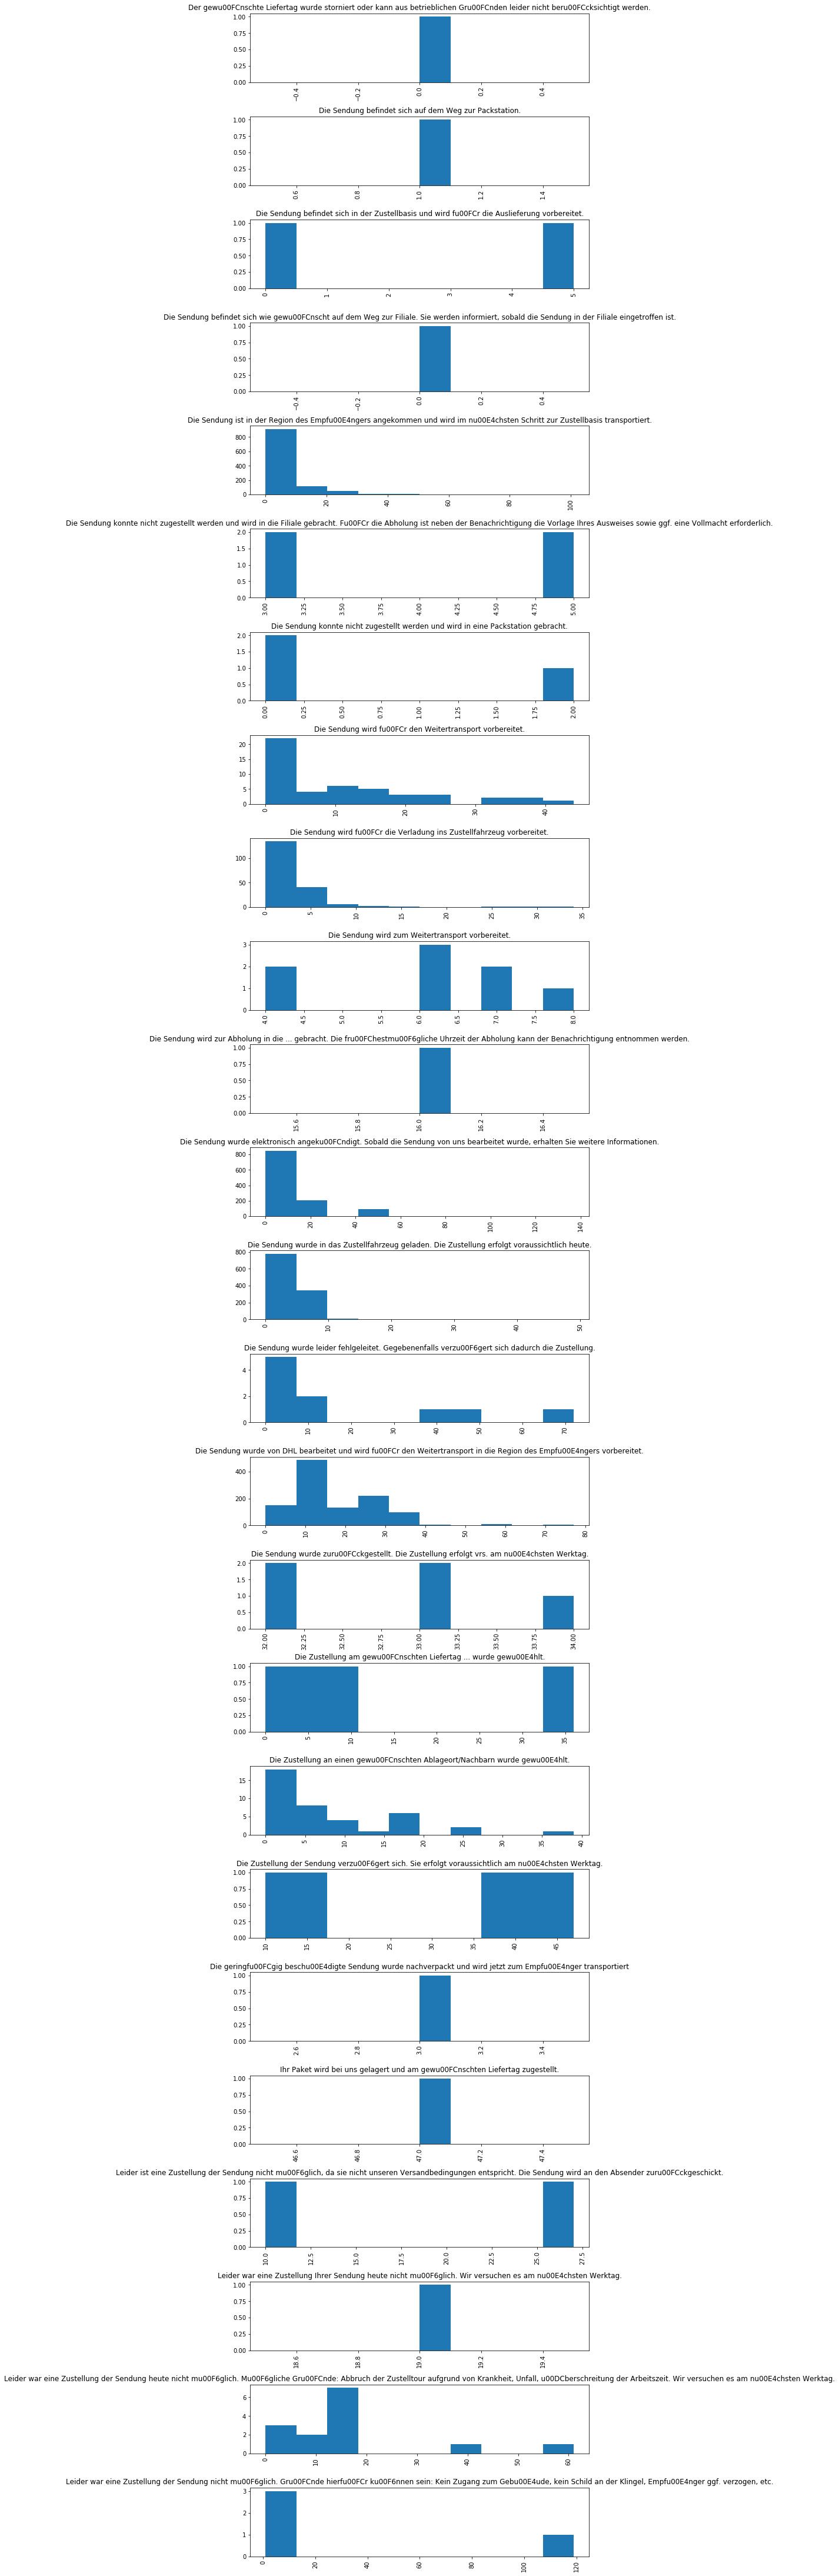

In [42]:
%matplotlib inline
df_temp["datum_diff_h"].hist(by=df_temp['status'], layout=(len(df_temp["status"].unique()), 1), figsize=(10,80))
plt.tight_layout()
df.drop(columns=["datum_diff_h"], inplace=True)

In [43]:
df.head()

,shipment_number,datum,status,ort,is_final_event,status_next,ort_next,datum_next,datum_diff
0,00340434188193339722,2019-11-29 15:27:00+00:00,Die Sendung wurde elektronisch angeku00FCndigt...,Unbekannt,0.0,Die Sendung wurde von DHL bearbeitet und wird ...,Hamburg,2019-11-30 14:04:00+00:00,0 days 22:37:00
1,00340434188193339722,2019-11-30 14:04:00+00:00,Die Sendung wurde von DHL bearbeitet und wird ...,Hamburg,0.0,Die Sendung ist in der Region des Empfu00E4nge...,Gu00FCnzburg,2019-12-02 21:11:00+00:00,2 days 07:07:00
2,00340434188193339722,2019-12-02 21:11:00+00:00,Die Sendung ist in der Region des Empfu00E4nge...,Gu00FCnzburg,0.0,Die Sendung wurde in das Zustellfahrzeug gelad...,Unbekannt,2019-12-03 08:33:00+00:00,0 days 11:22:00
3,00340434188193339722,2019-12-03 08:33:00+00:00,Die Sendung wurde in das Zustellfahrzeug gelad...,Unbekannt,0.0,Die Sendung wurde erfolgreich zugestellt.,Unbekannt,2019-12-03 11:28:00+00:00,0 days 02:55:00
4,00340434188193339722,2019-12-03 11:28:00+00:00,Die Sendung wurde erfolgreich zugestellt.,Unbekannt,1.0,SuccessDelivery,SuccessDelivery,2019-12-13 00:00:00+00:00,9 days 12:32:00


### Distribution of time diff for various locations

In [44]:
df["datum_diff_h"] = df['datum_diff'].astype('timedelta64[h]')

In [45]:
df_temp = df[df["is_final_event"] == 0][["datum_diff_h", "status", "ort"]]
df_temp.reset_index()
df_temp.index = range(0,df_temp.shape[0])
df_temp.head()

,datum_diff_h,status,ort
0,22.0,Die Sendung wurde elektronisch angeku00FCndigt...,Unbekannt
1,55.0,Die Sendung wurde von DHL bearbeitet und wird ...,Hamburg
2,11.0,Die Sendung ist in der Region des Empfu00E4nge...,Gu00FCnzburg
3,2.0,Die Sendung wurde in das Zustellfahrzeug gelad...,Unbekannt
4,3.0,Die Sendung wurde elektronisch angeku00FCndigt...,Unbekannt


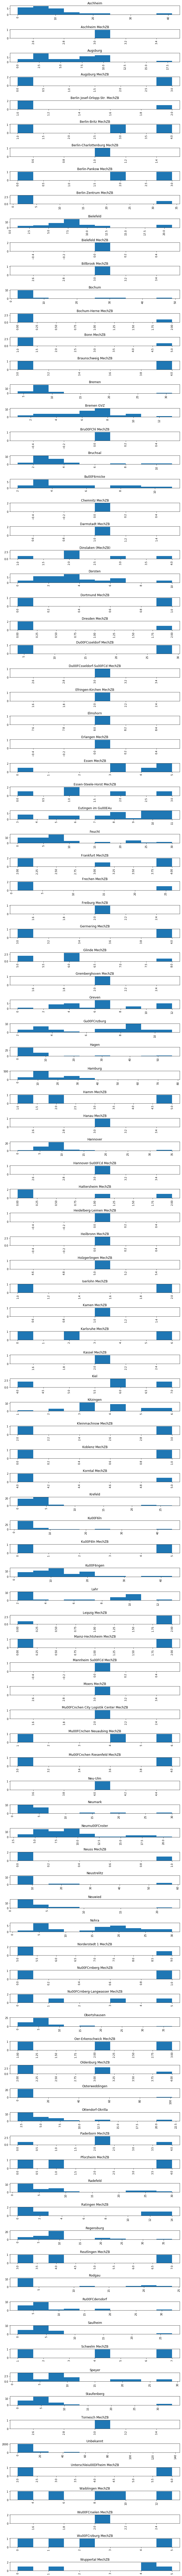

In [46]:
%matplotlib inline
df_temp["datum_diff_h"].hist(by=df_temp['ort'], layout=(len(df_temp["ort"].unique()), 1), figsize=(10,140))
plt.tight_layout()
df.drop(columns=["datum_diff_h"], inplace=True)

### Distribution of time diff for various locations and states

In [47]:
df["datum_diff_h"] = df['datum_diff'].astype('timedelta64[h]')

In [48]:
df_temp = df[df["is_final_event"] == 0][["datum_diff_h", "status", "ort"]]
df_temp.reset_index()
df_temp.index = range(0,df_temp.shape[0])
df_temp.head()

,datum_diff_h,status,ort
0,22.0,Die Sendung wurde elektronisch angeku00FCndigt...,Unbekannt
1,55.0,Die Sendung wurde von DHL bearbeitet und wird ...,Hamburg
2,11.0,Die Sendung ist in der Region des Empfu00E4nge...,Gu00FCnzburg
3,2.0,Die Sendung wurde in das Zustellfahrzeug gelad...,Unbekannt
4,3.0,Die Sendung wurde elektronisch angeku00FCndigt...,Unbekannt


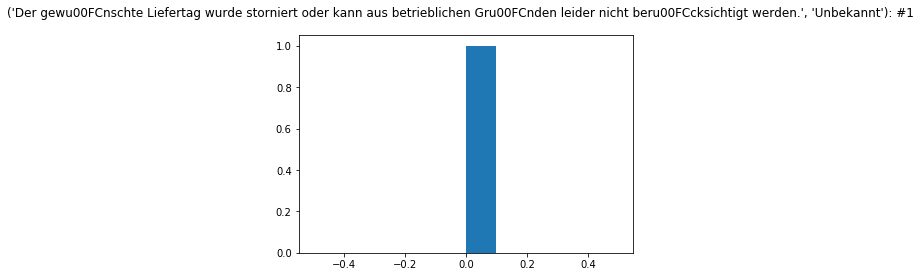

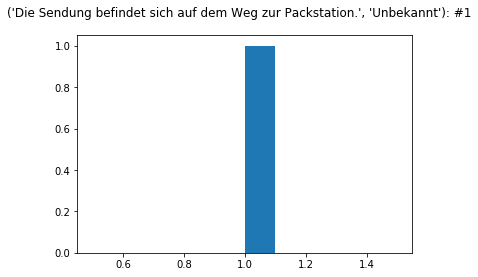

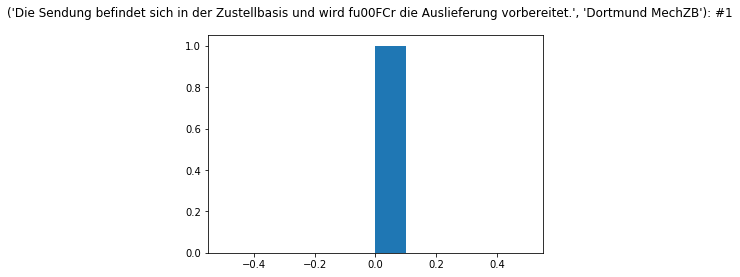

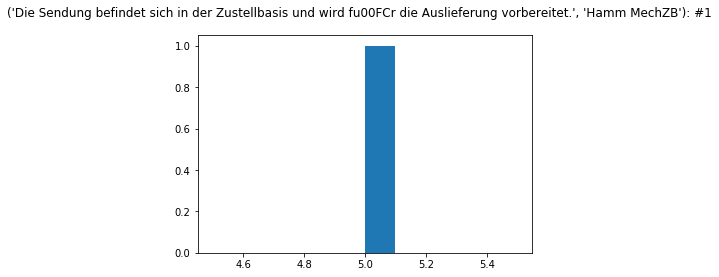

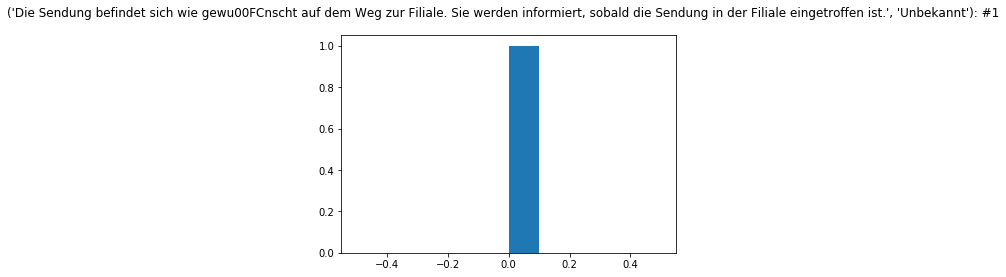

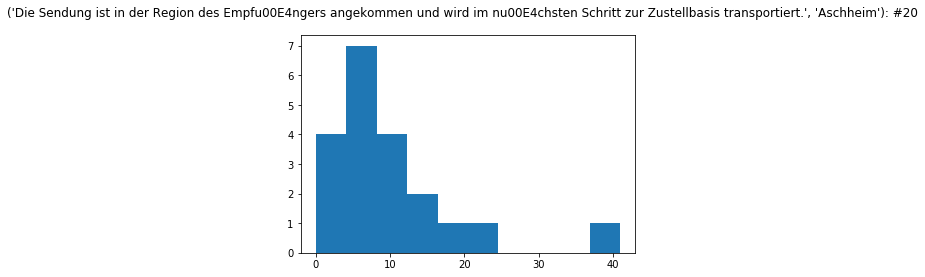

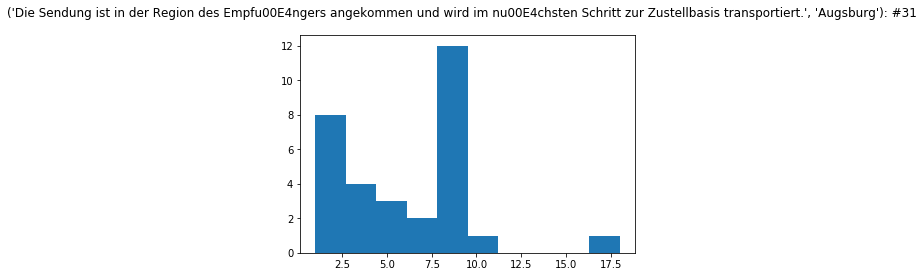

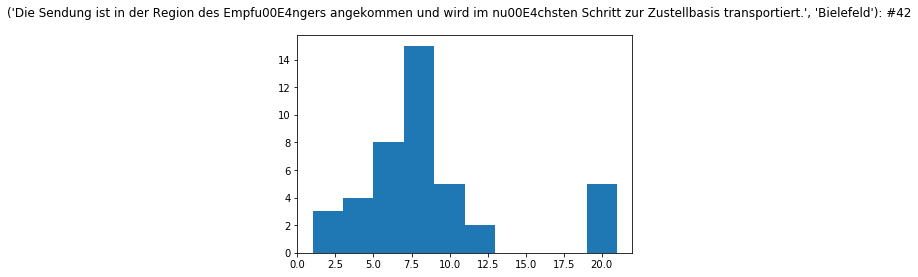

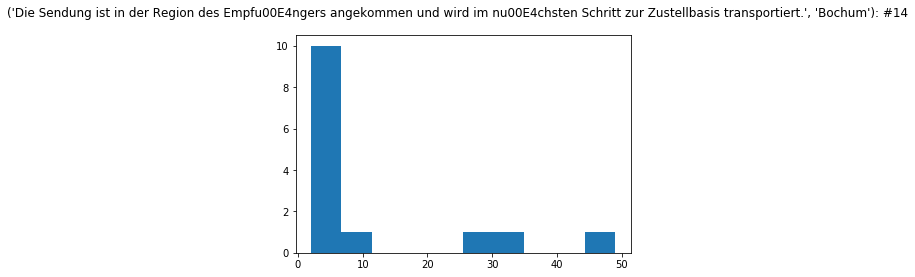

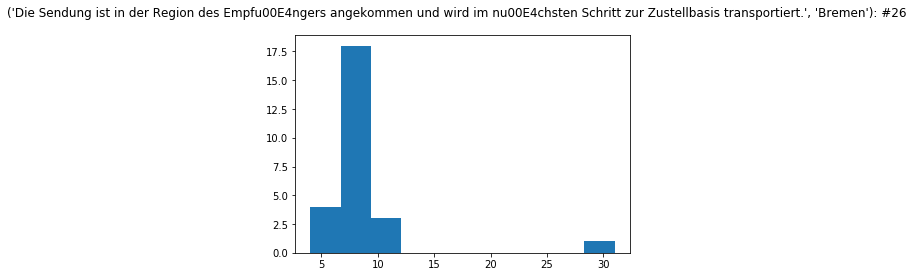

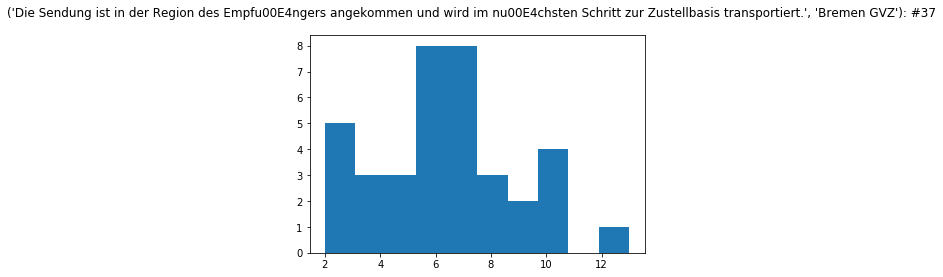

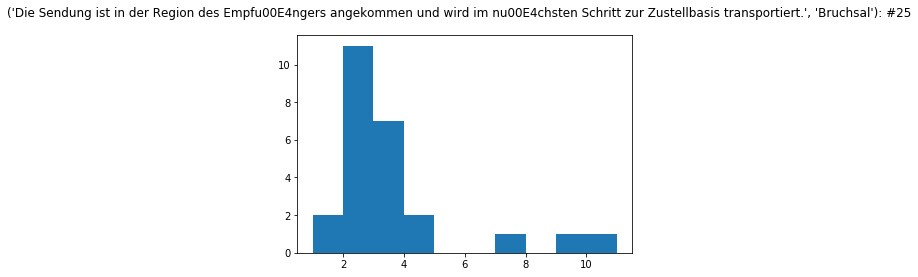

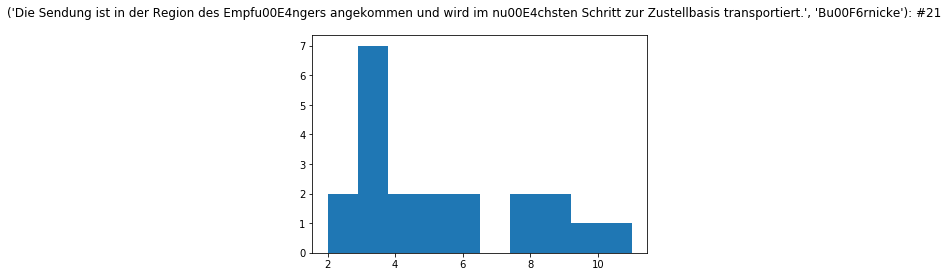

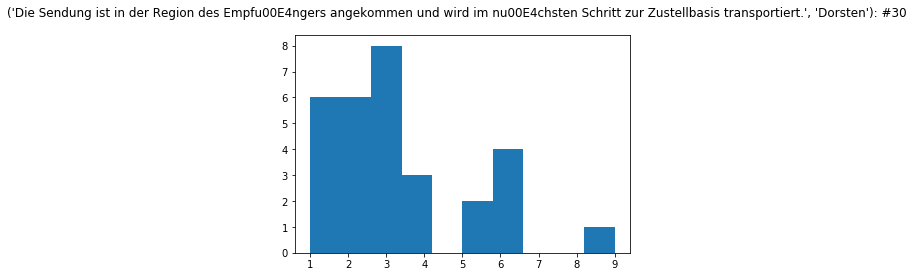

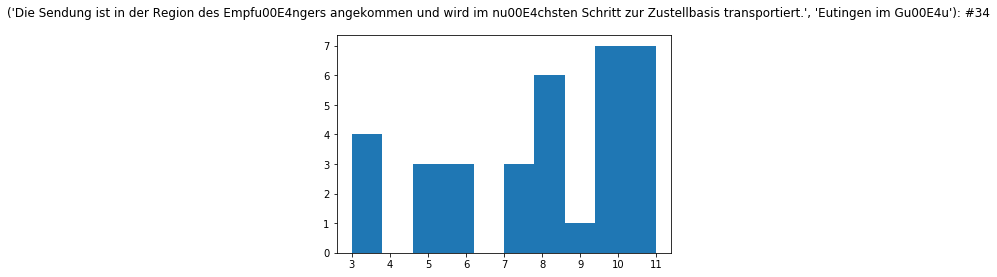

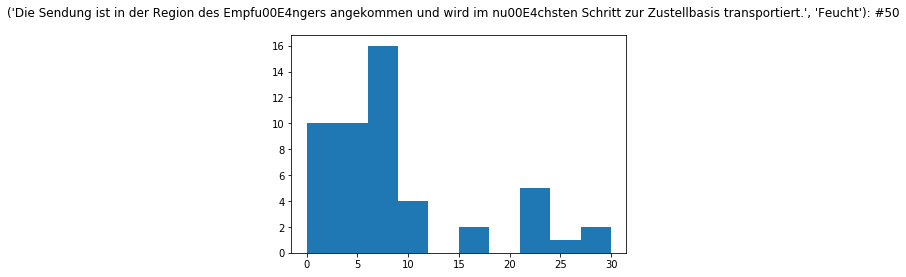

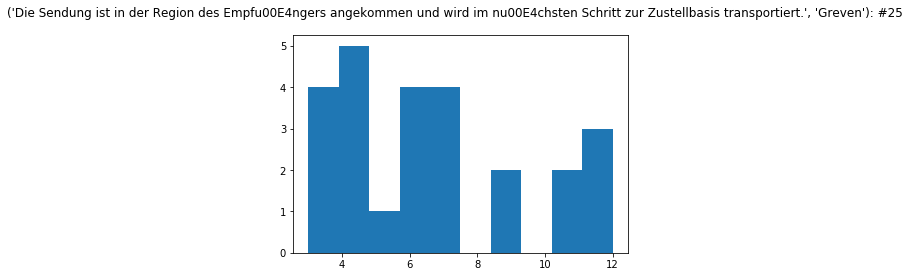

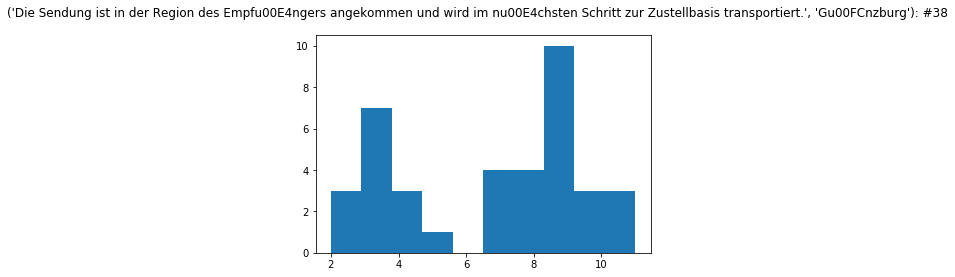

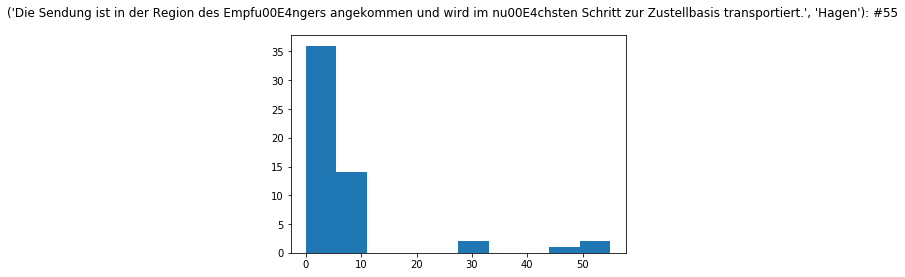

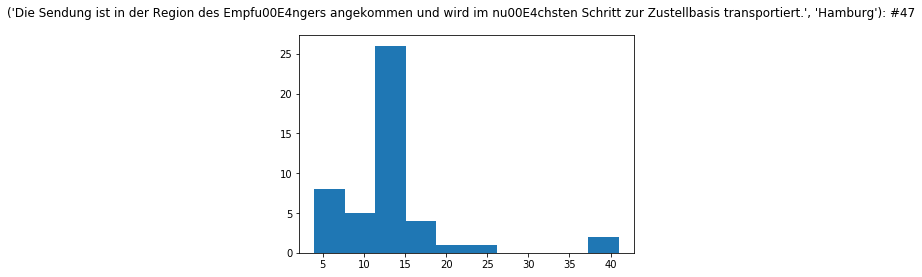

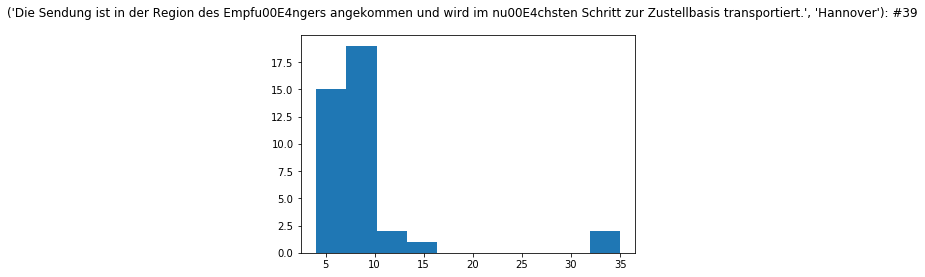

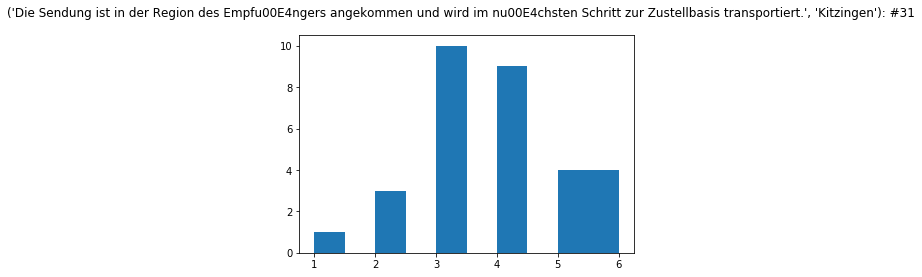

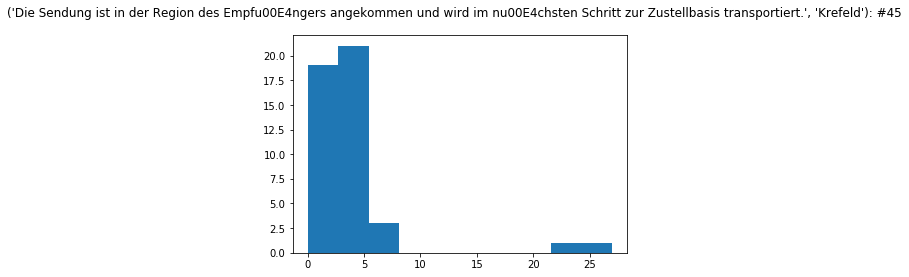

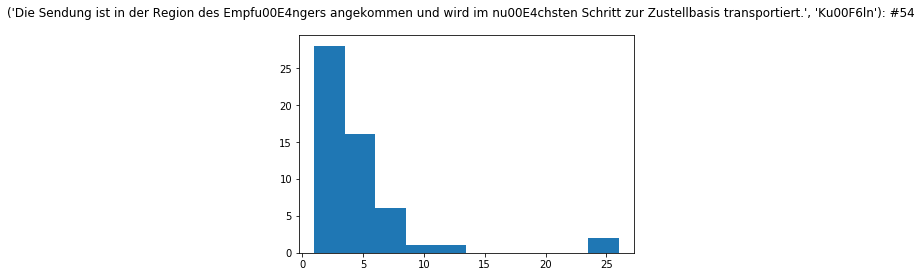

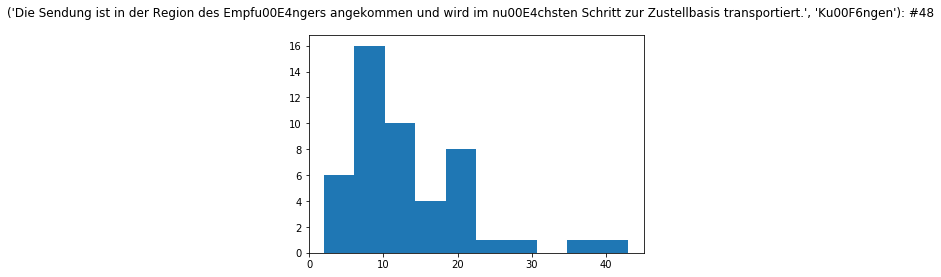

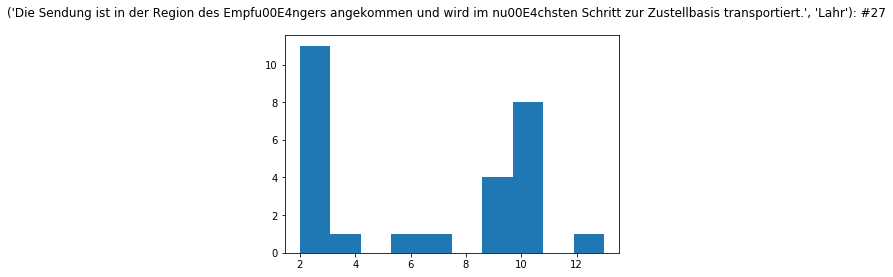

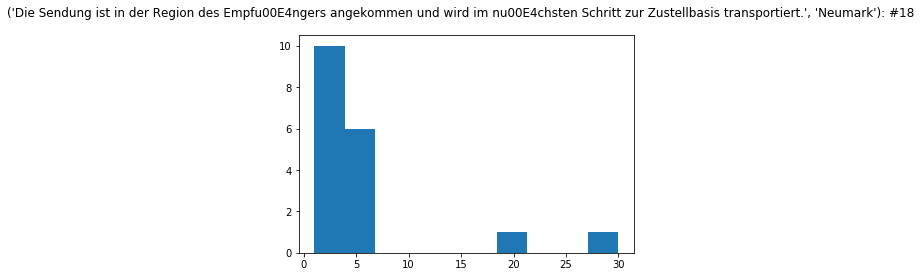

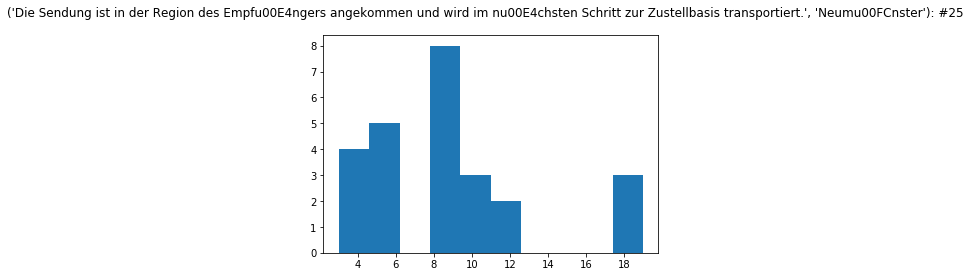

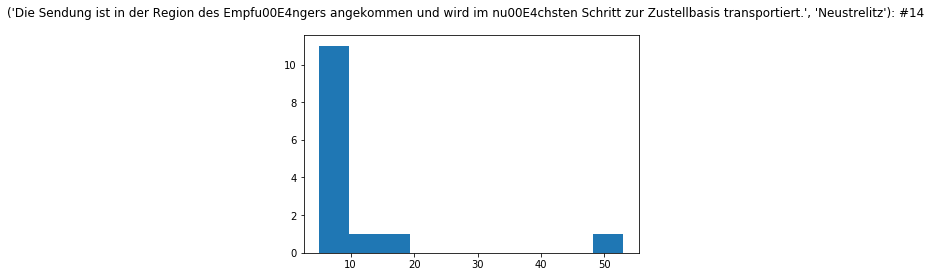

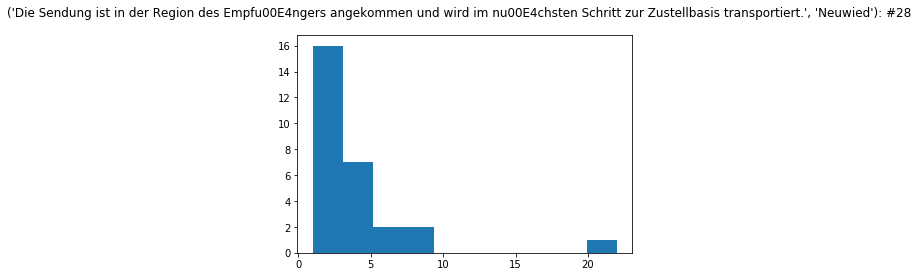

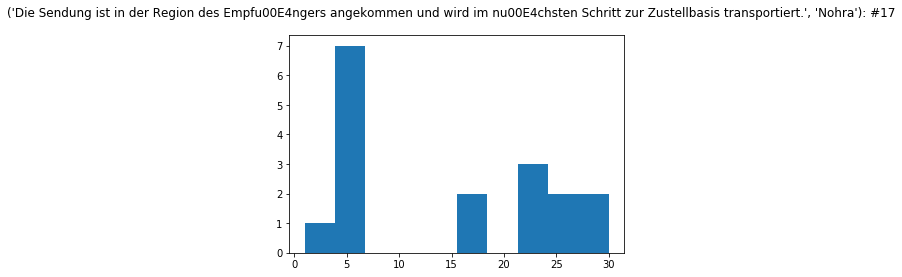

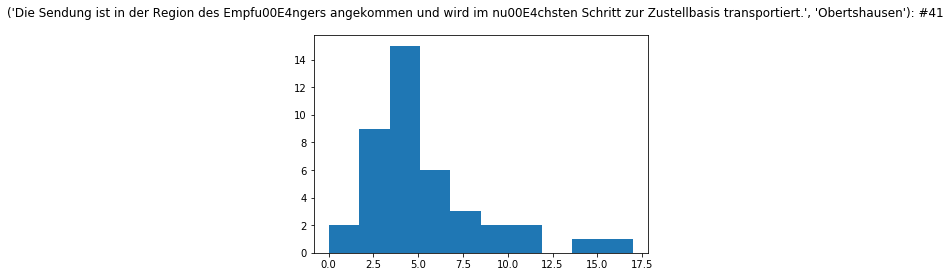

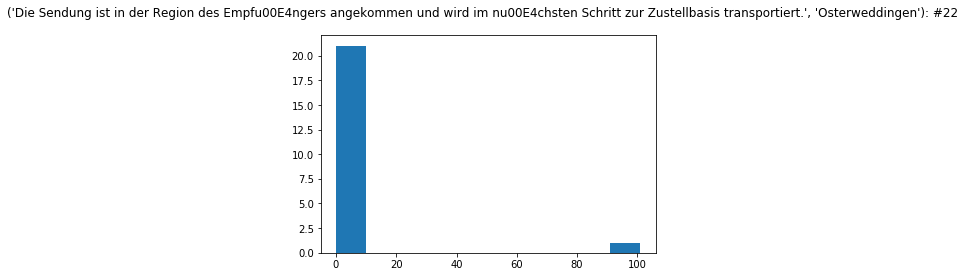

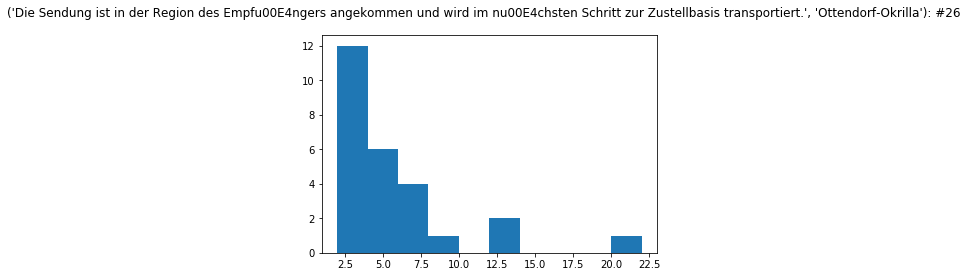

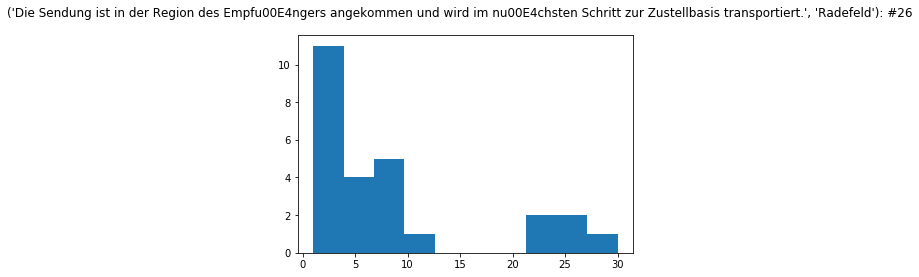

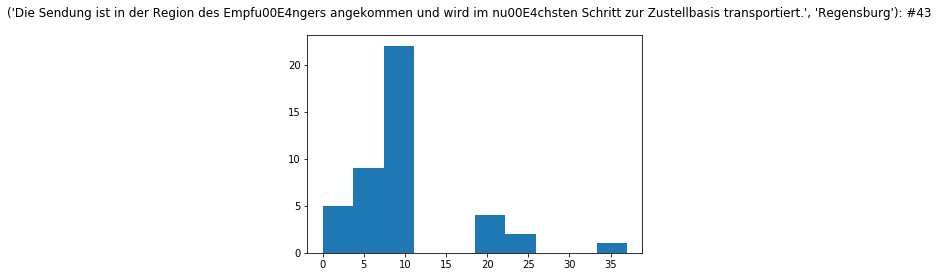

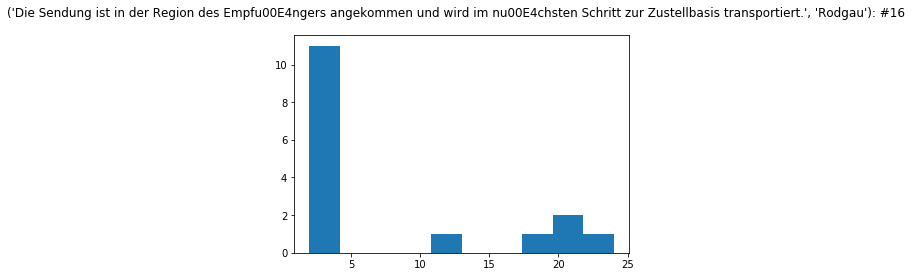

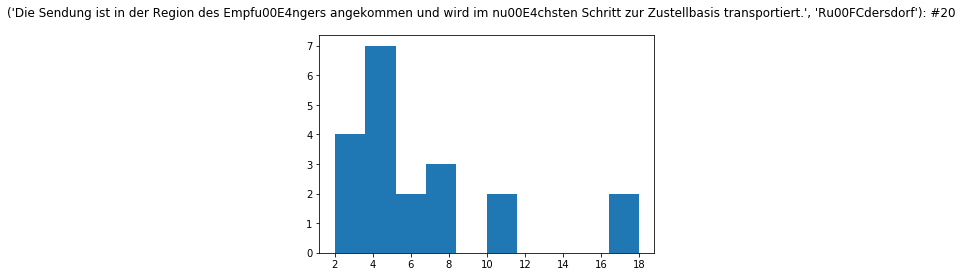

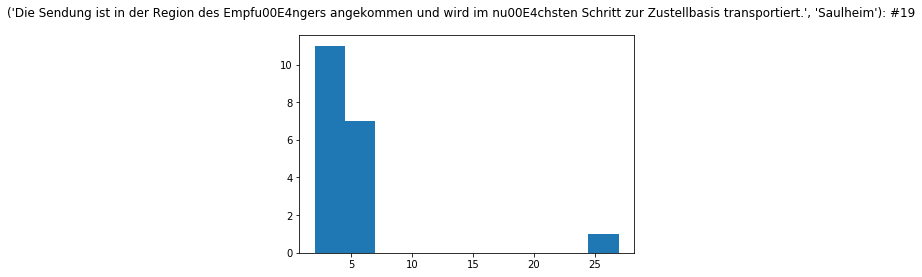

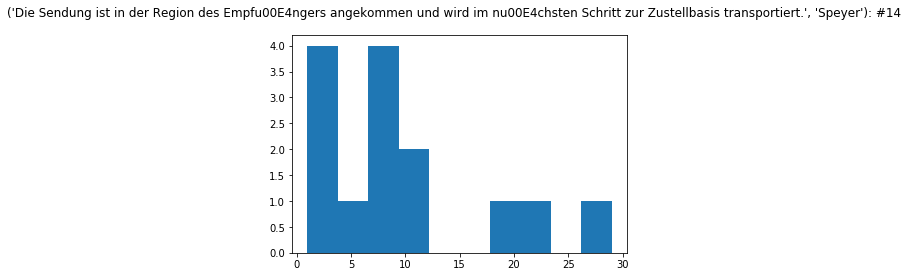

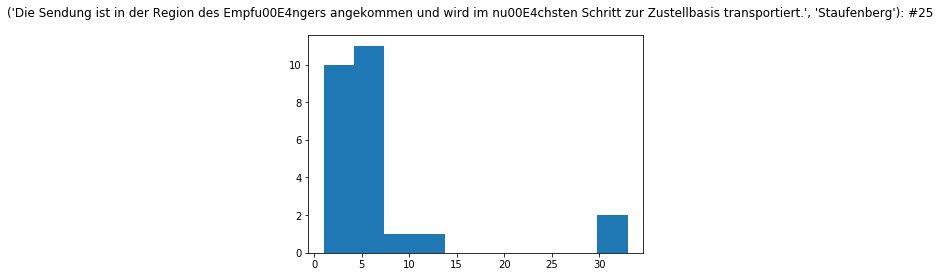

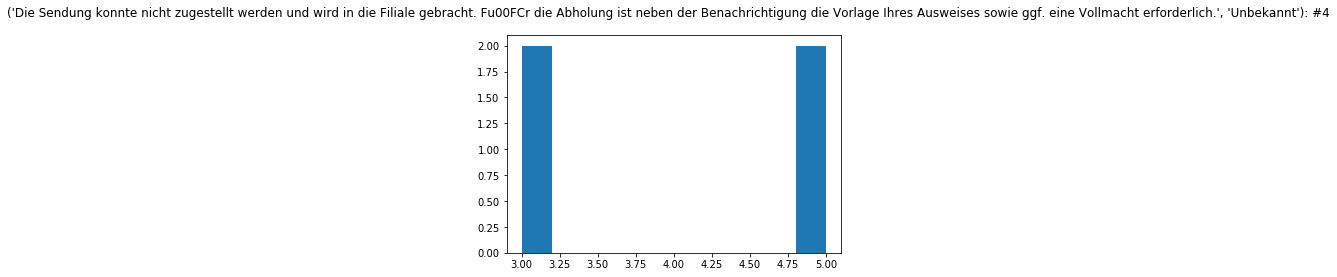

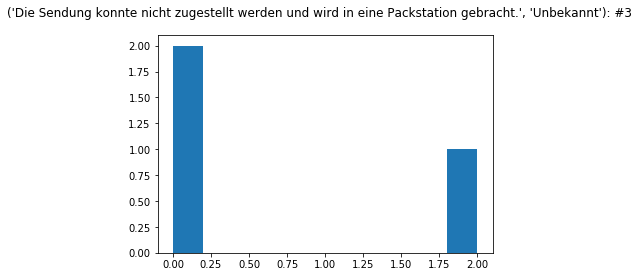

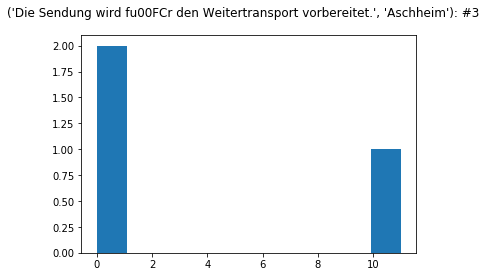

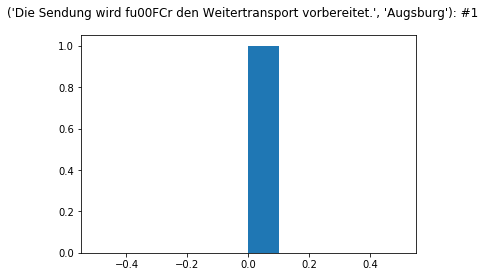

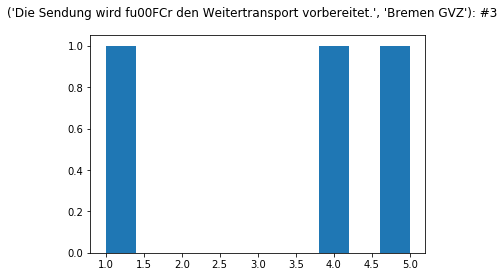

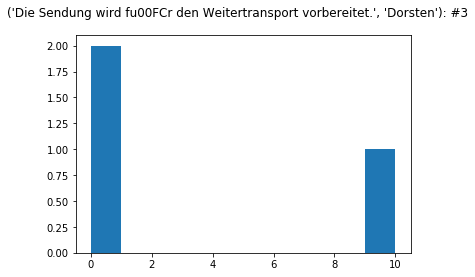

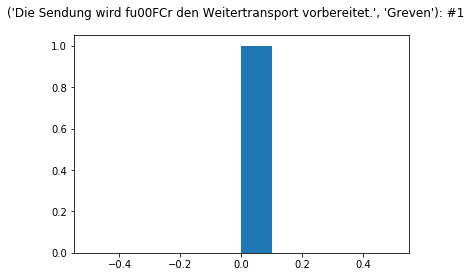

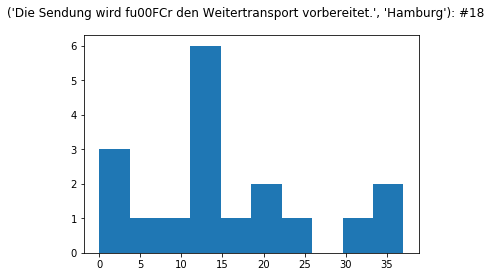

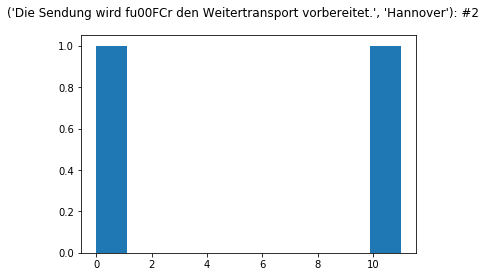

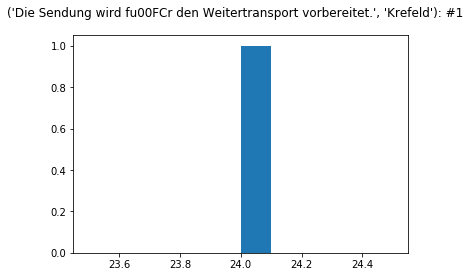

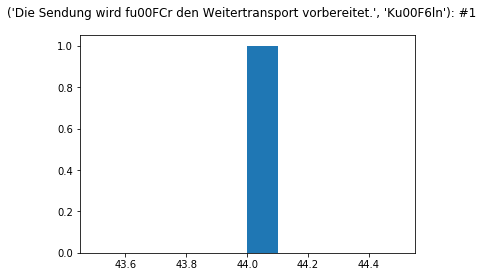

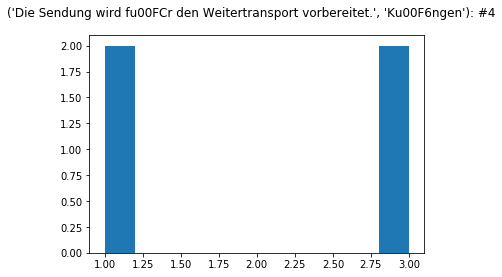

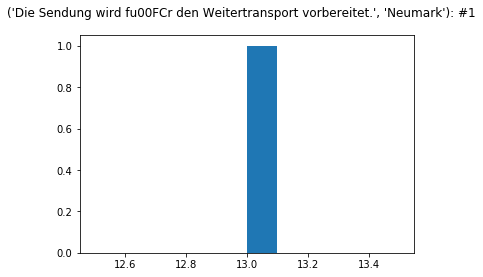

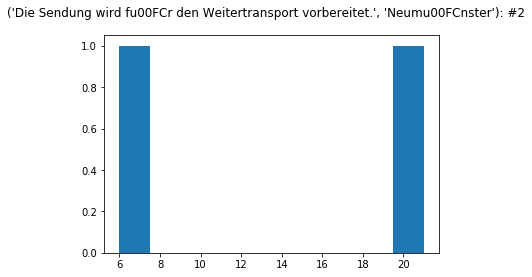

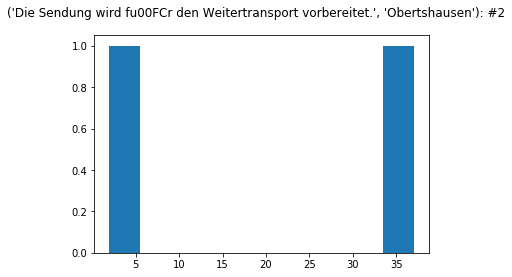

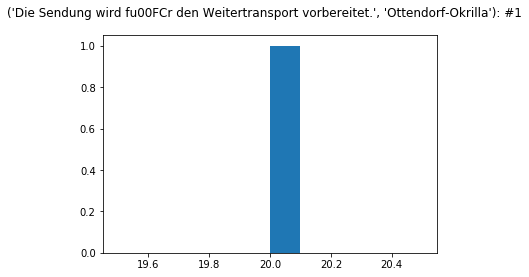

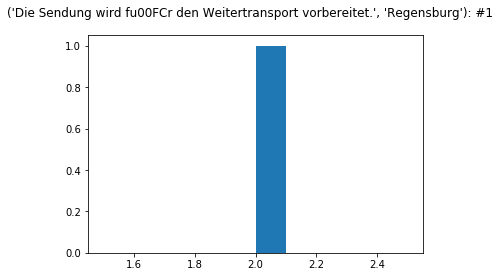

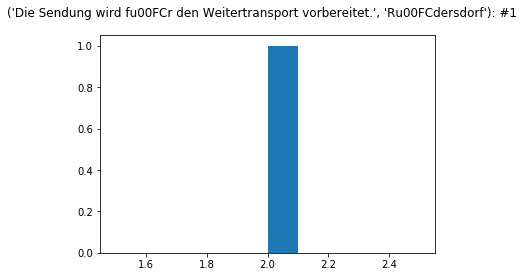

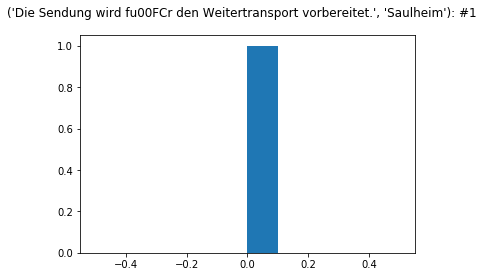

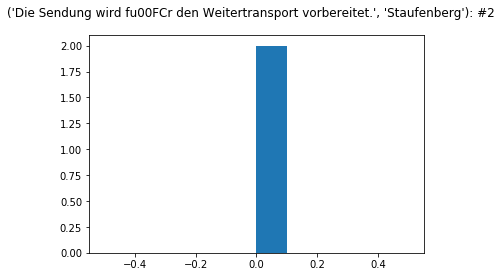

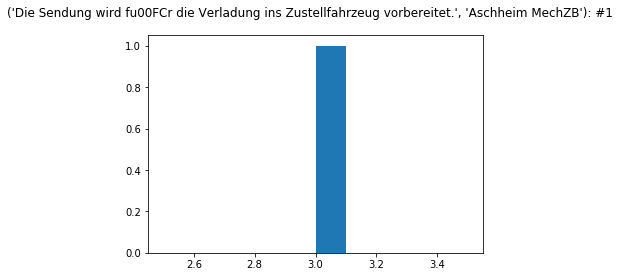

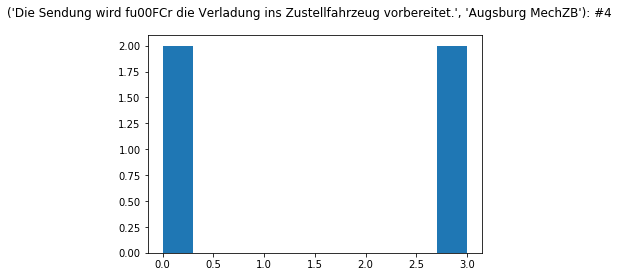

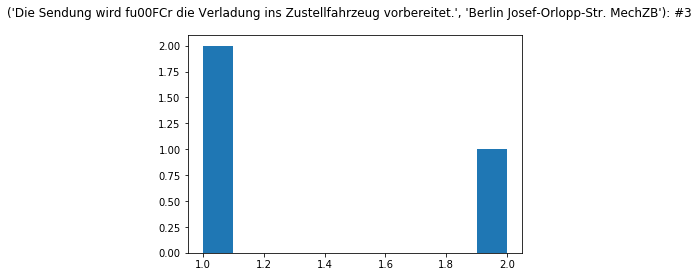

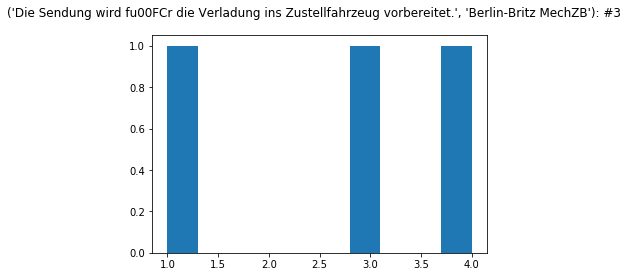

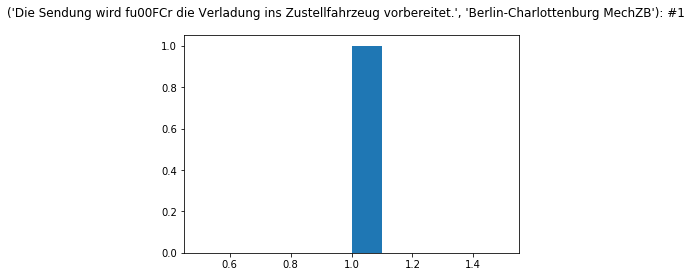

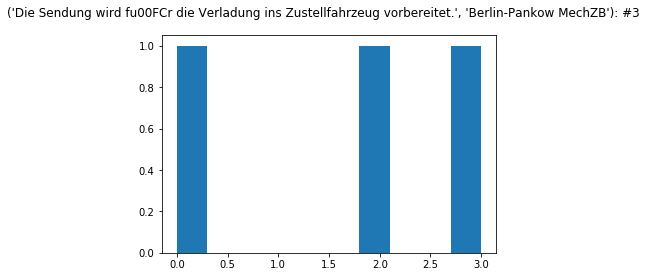

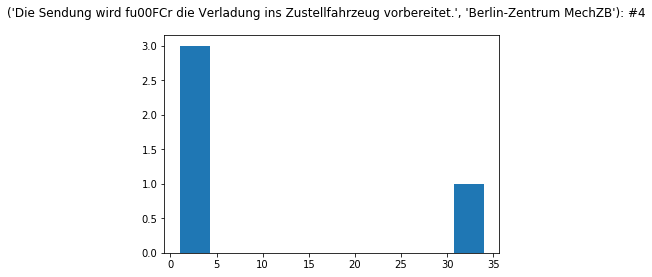

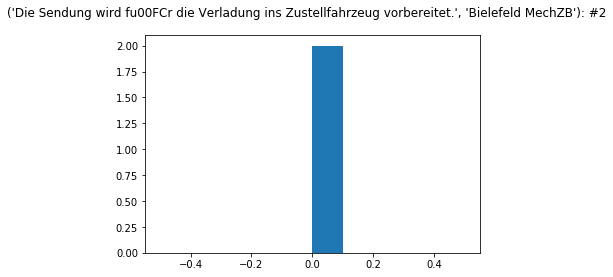

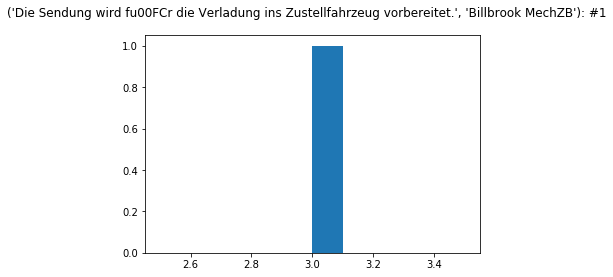

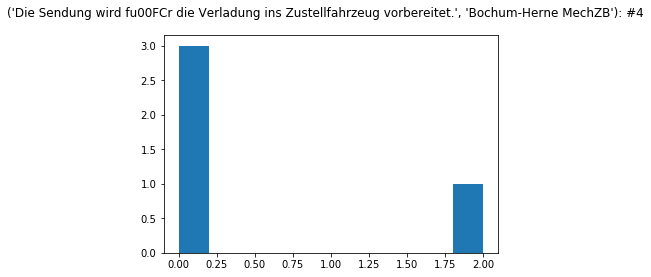

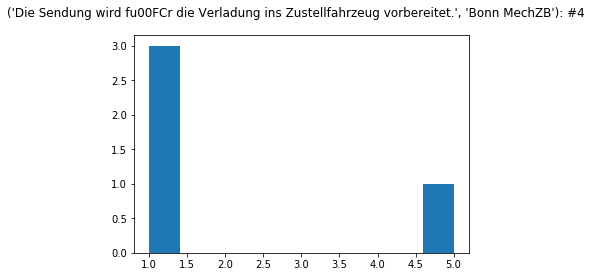

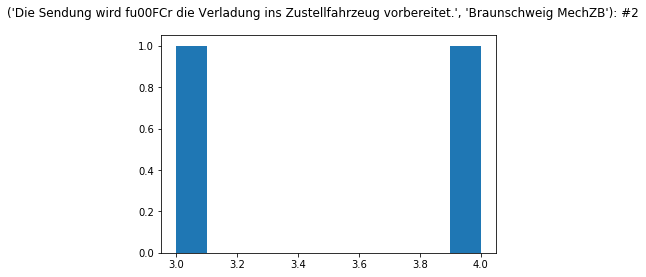

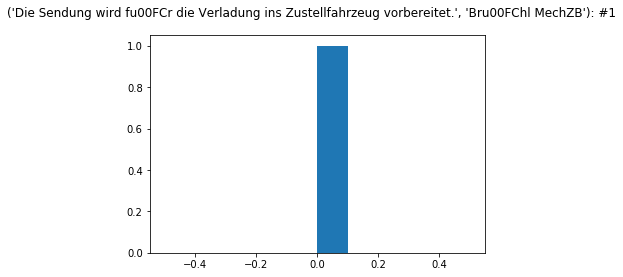

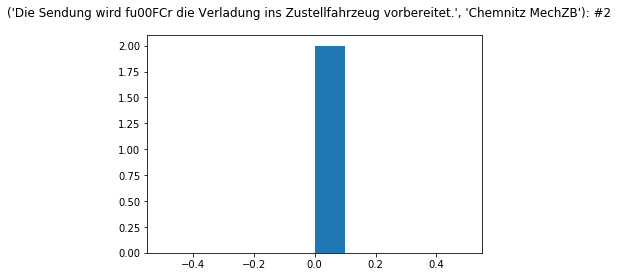

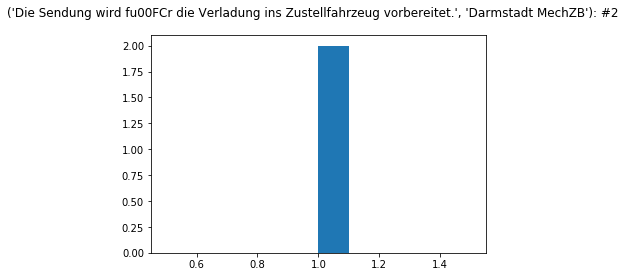

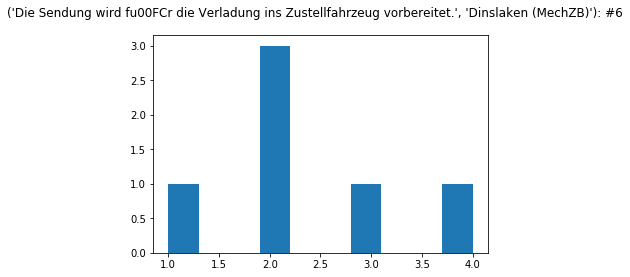

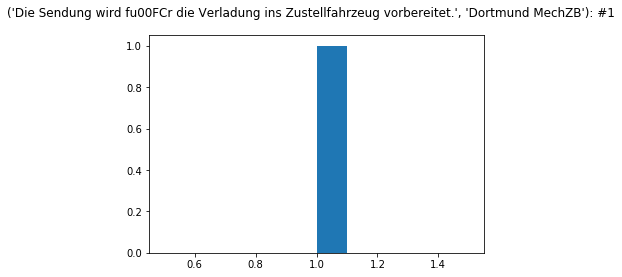

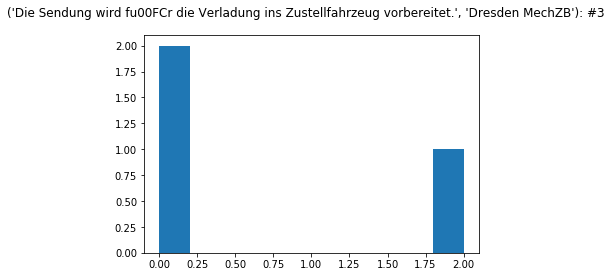

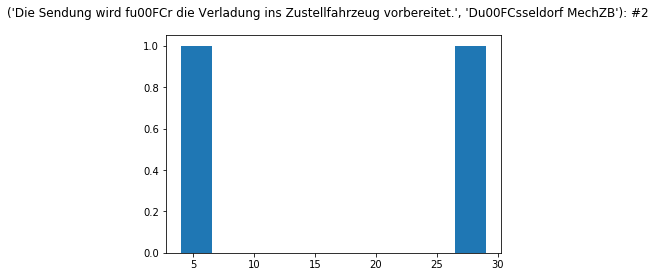

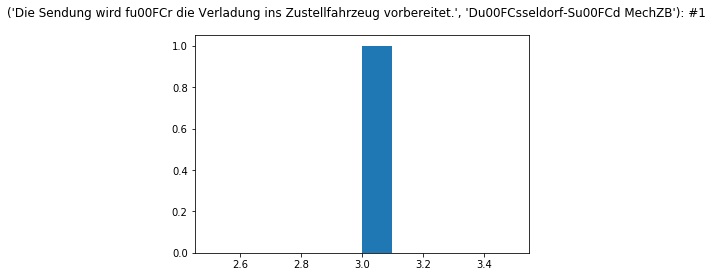

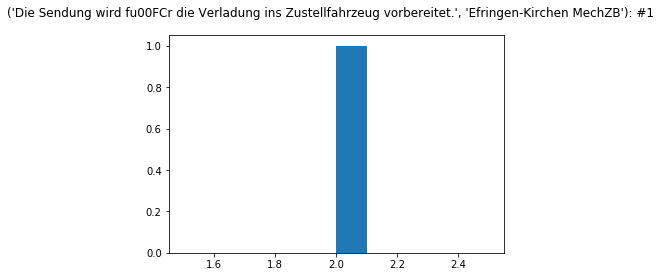

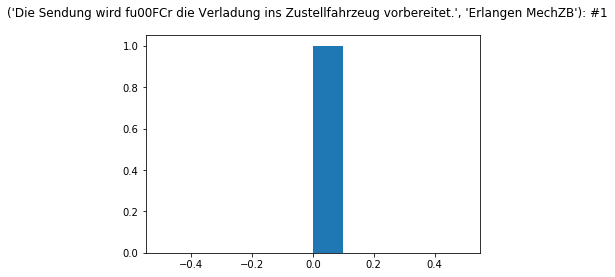

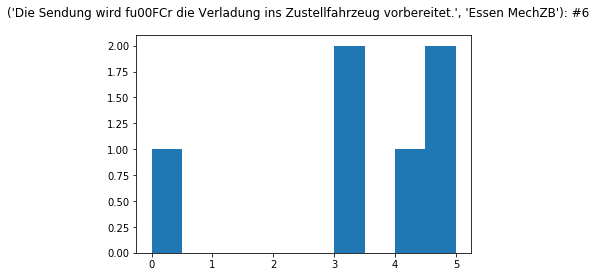

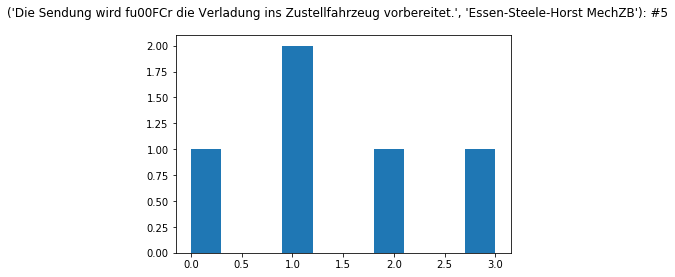

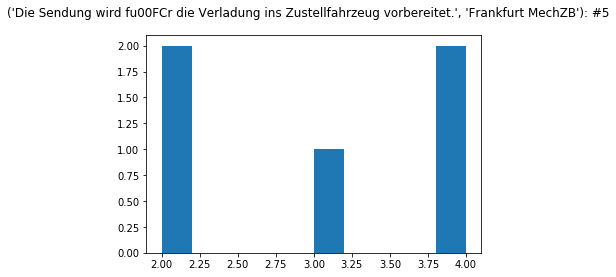

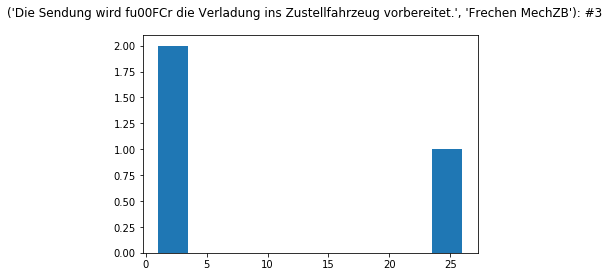

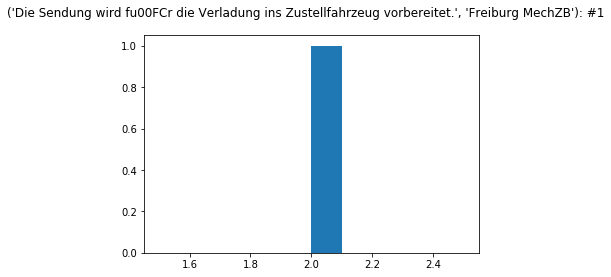

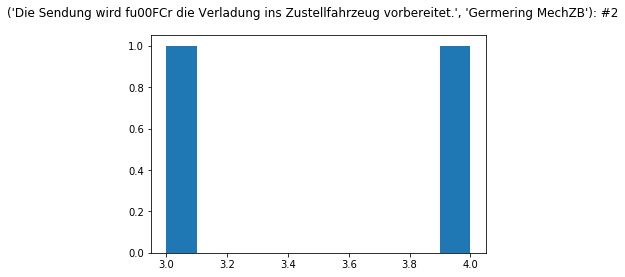

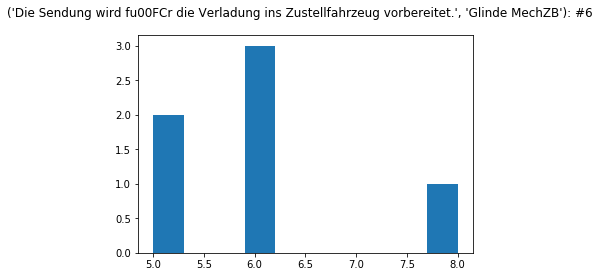

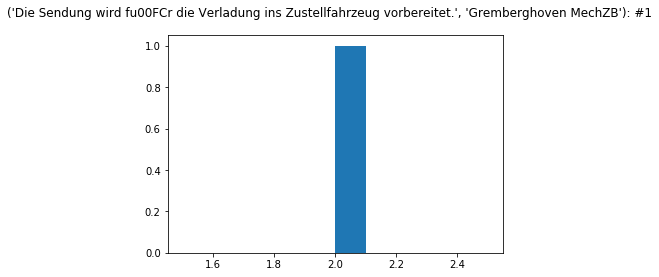

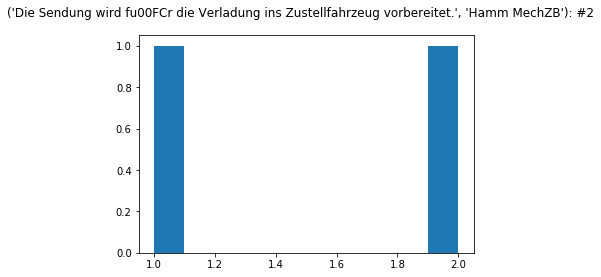

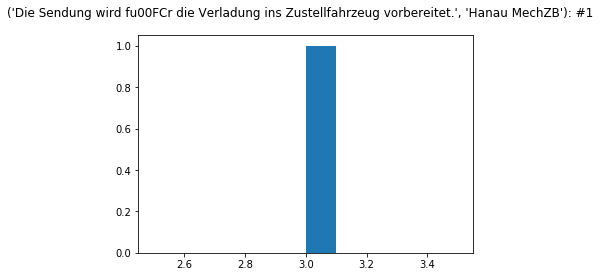

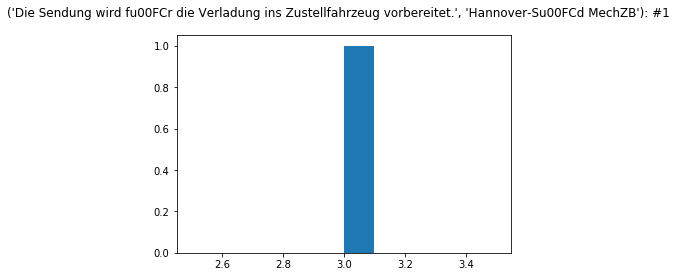

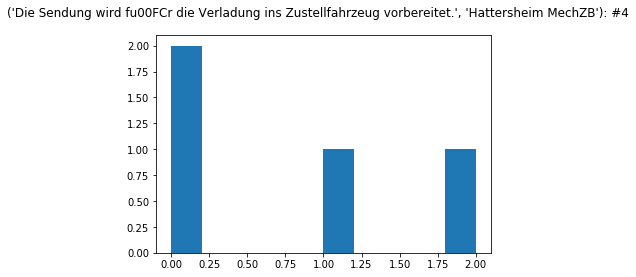

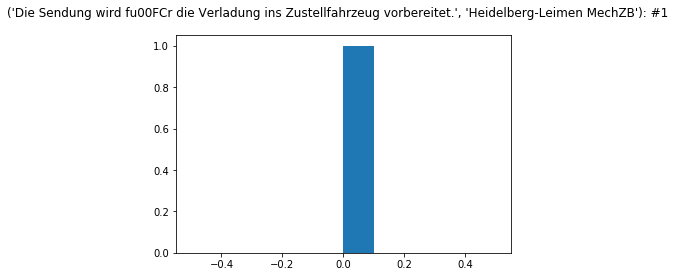

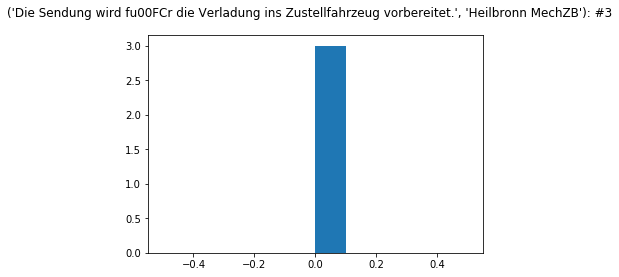

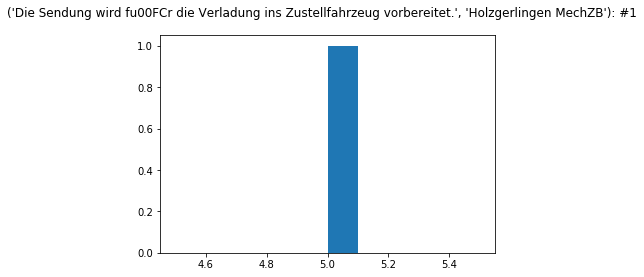

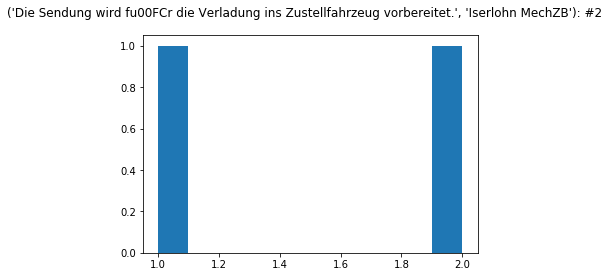

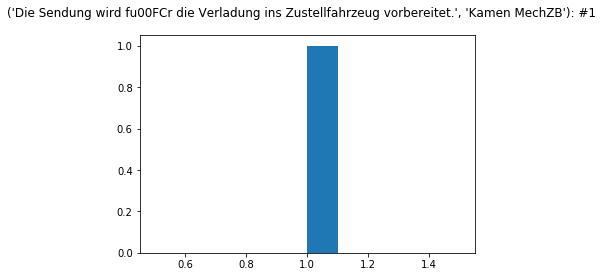

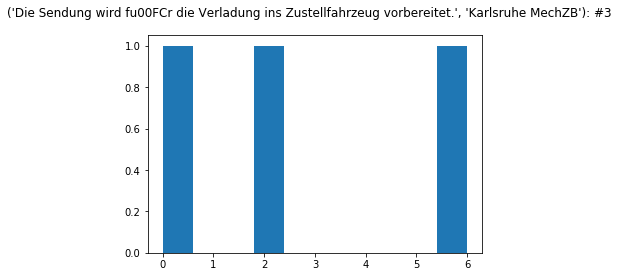

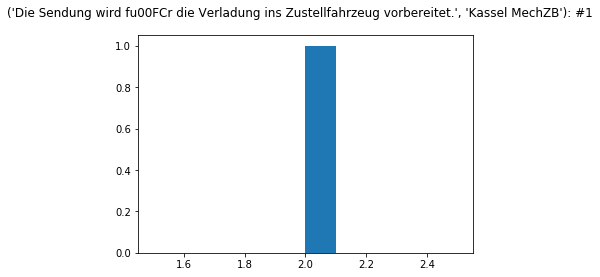

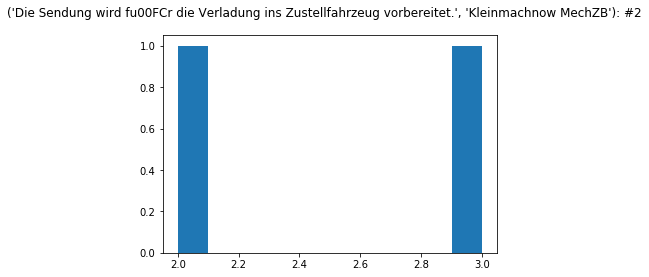

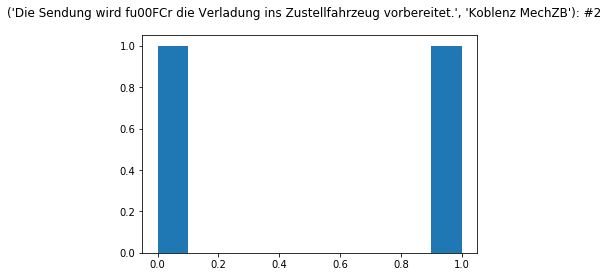

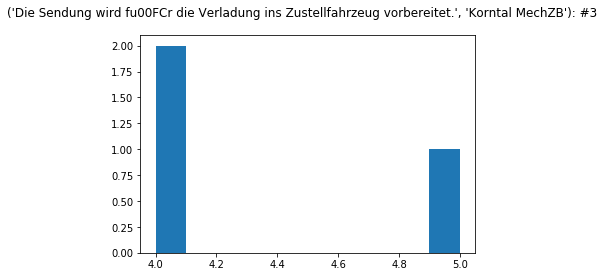

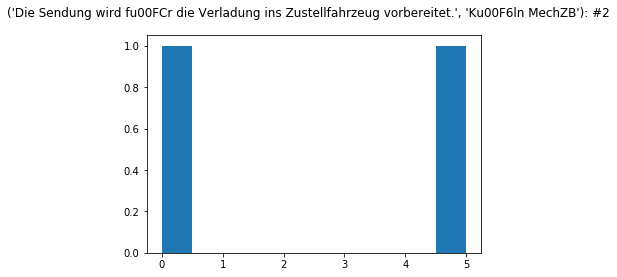

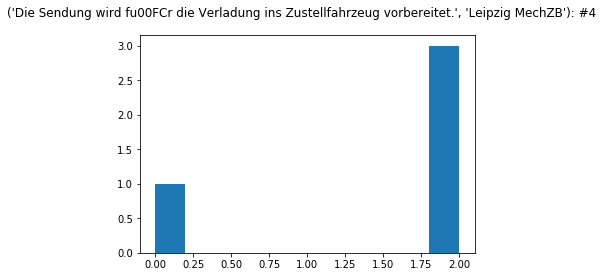

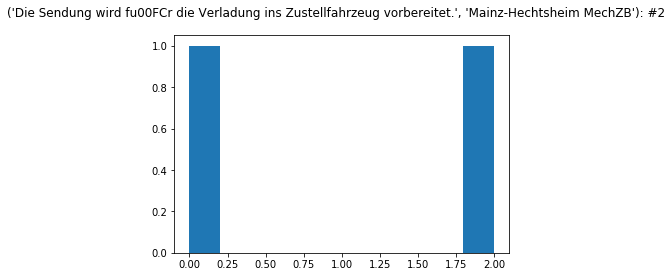

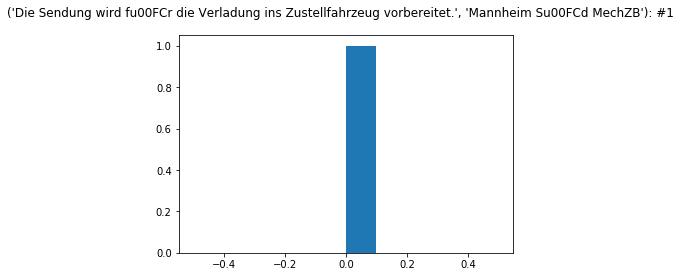

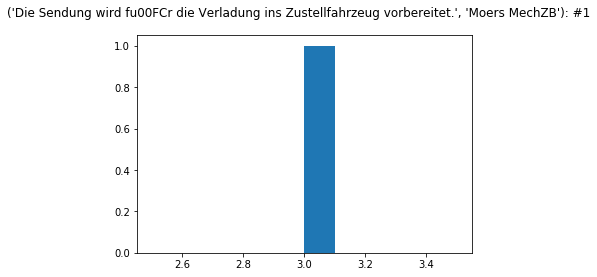

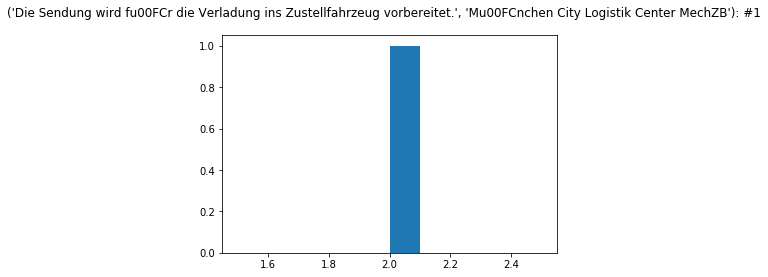

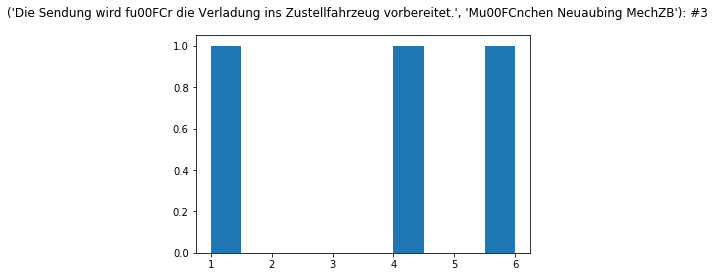

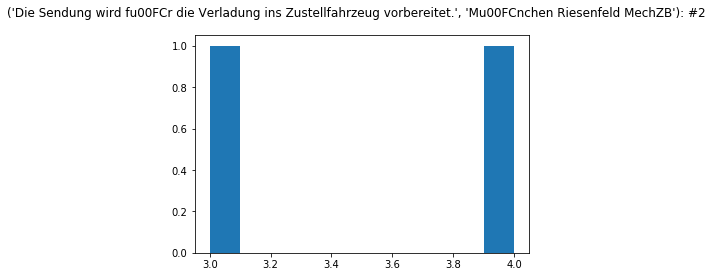

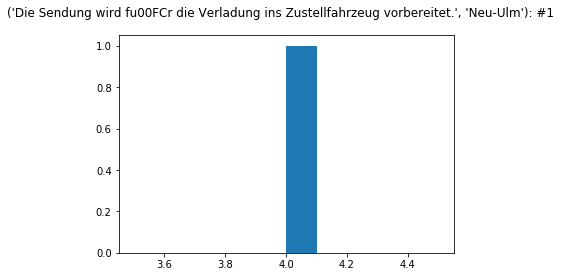

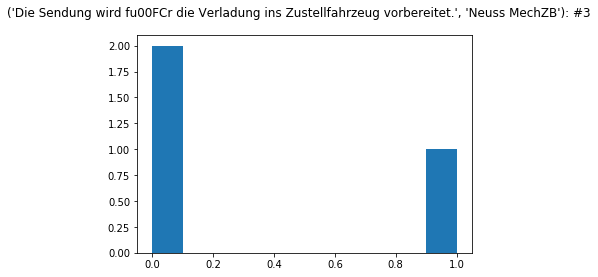

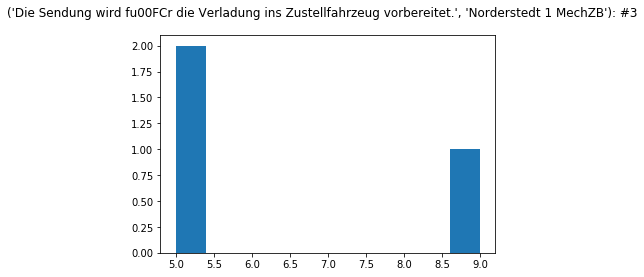

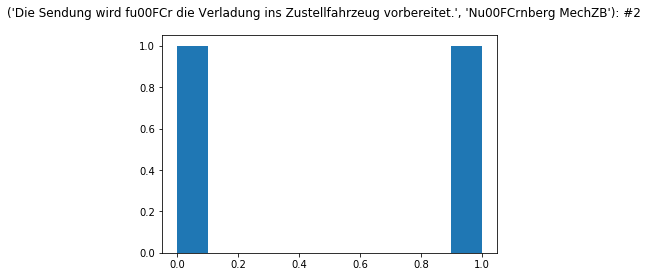

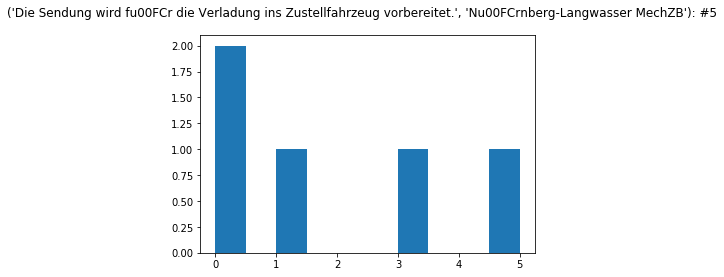

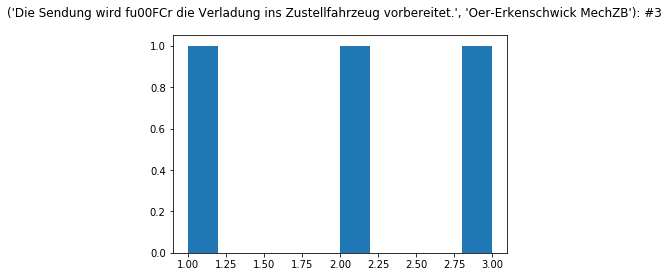

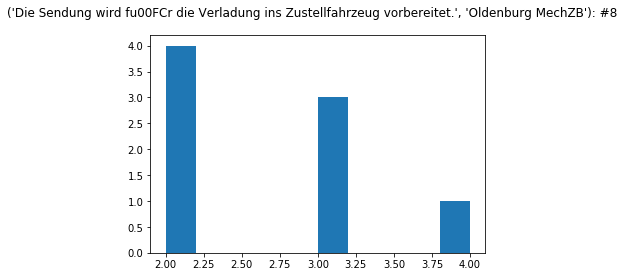

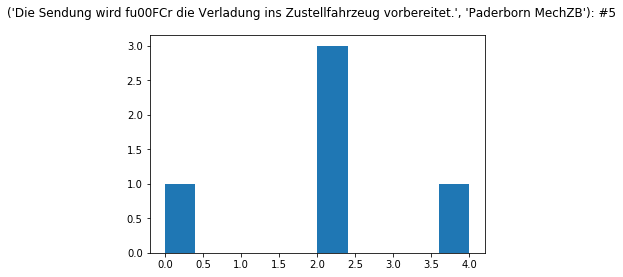

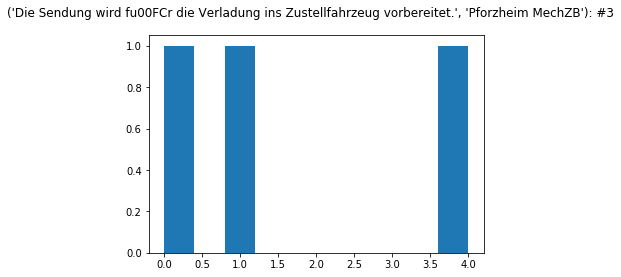

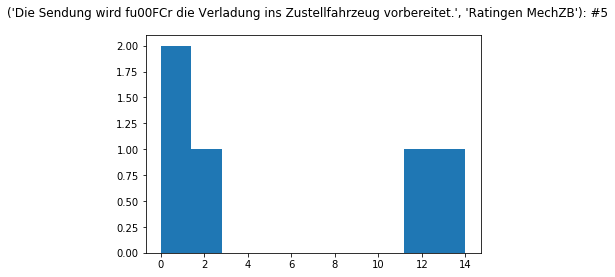

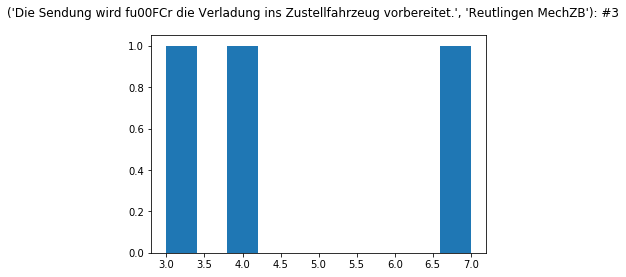

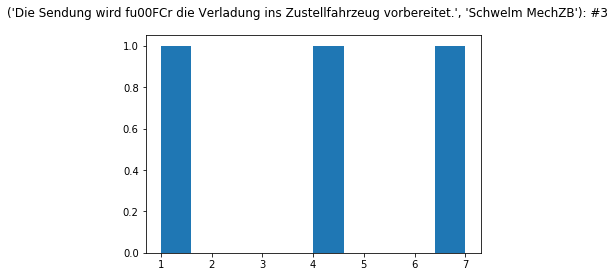

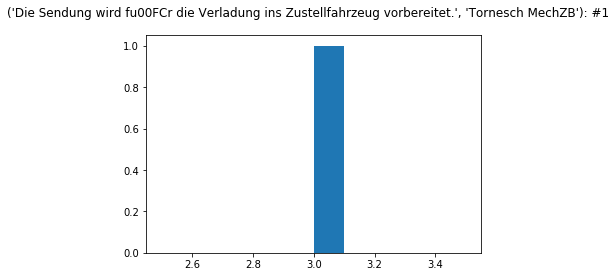

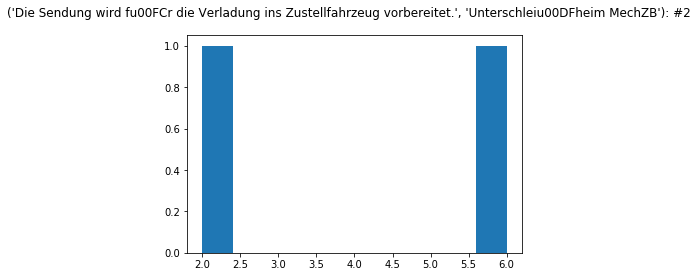

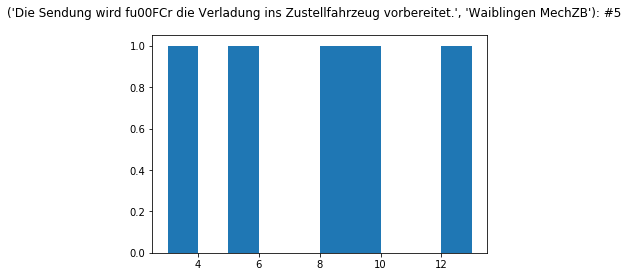

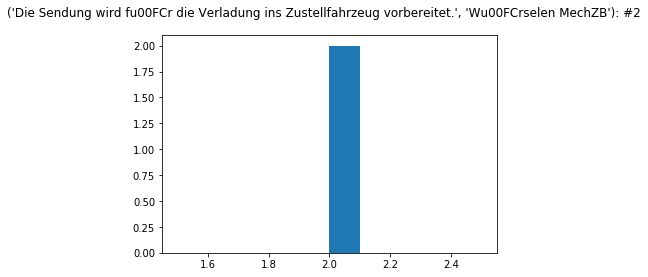

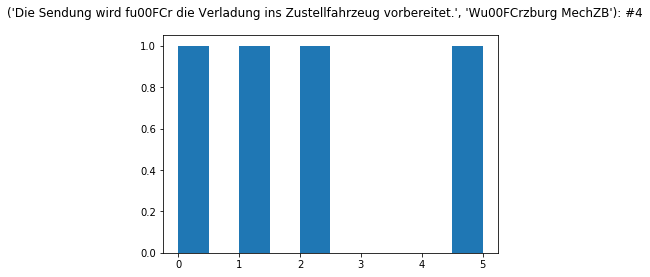

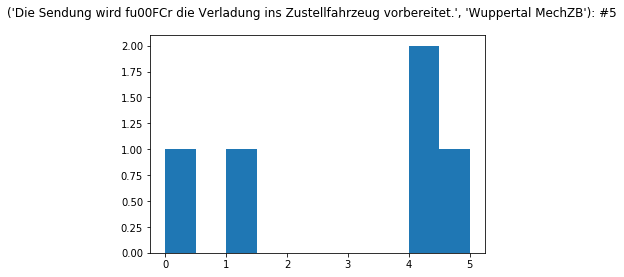

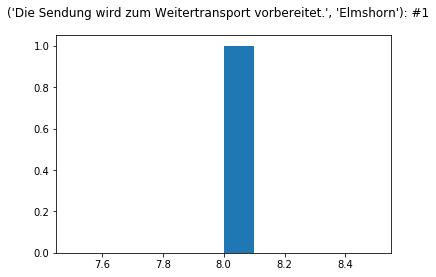

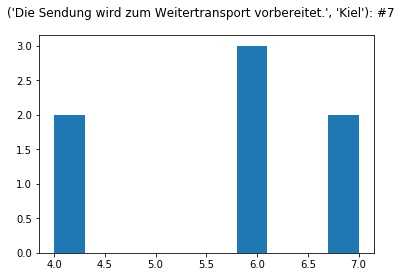

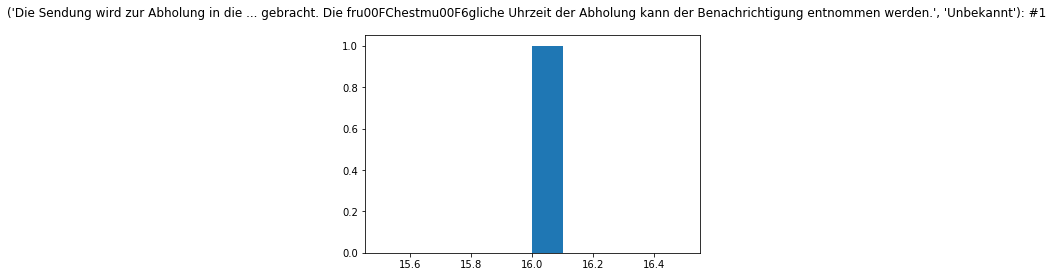

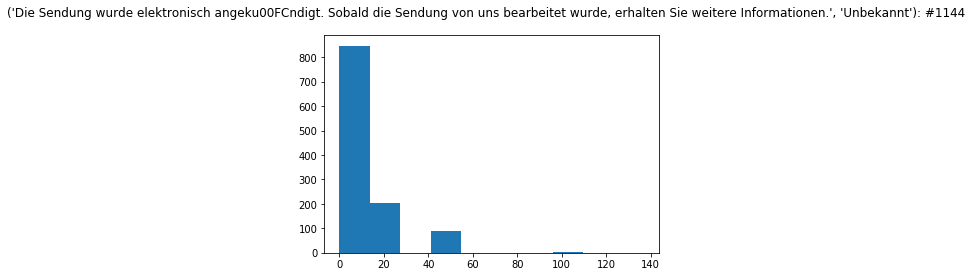

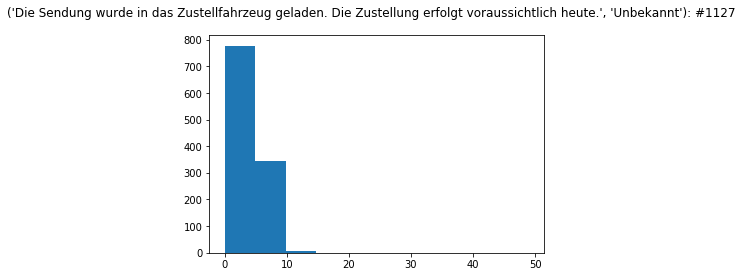

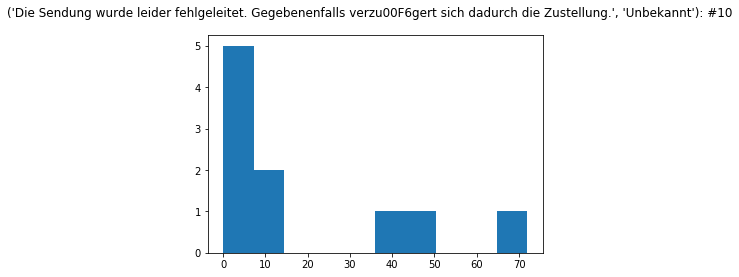

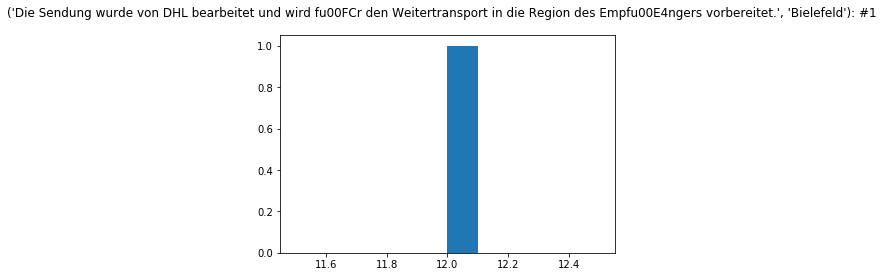

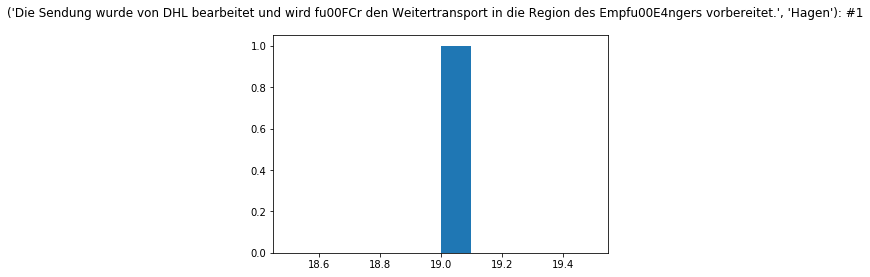

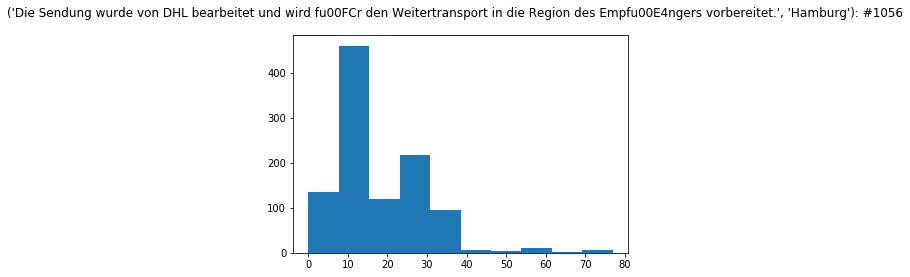

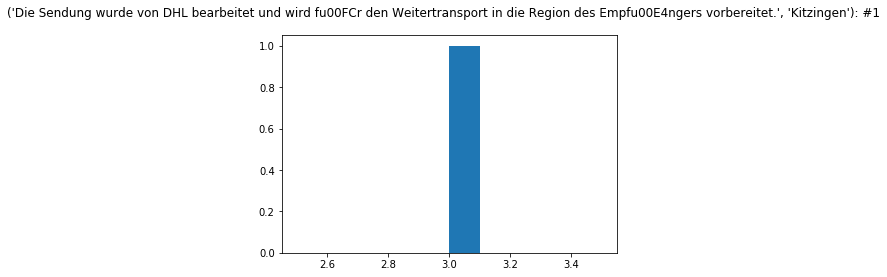

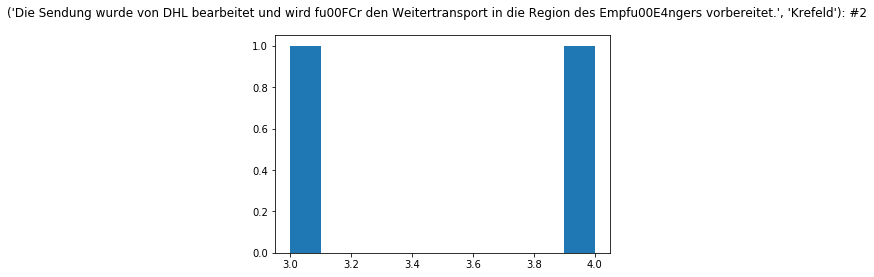

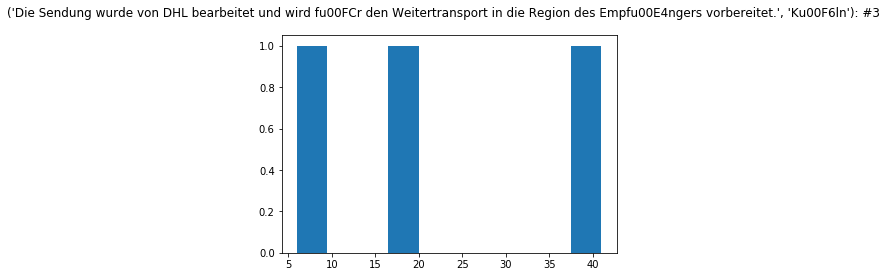

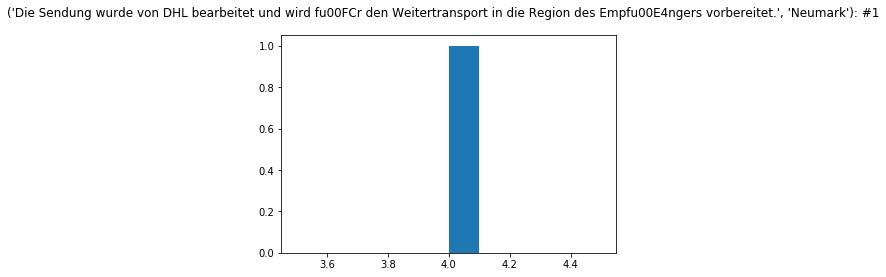

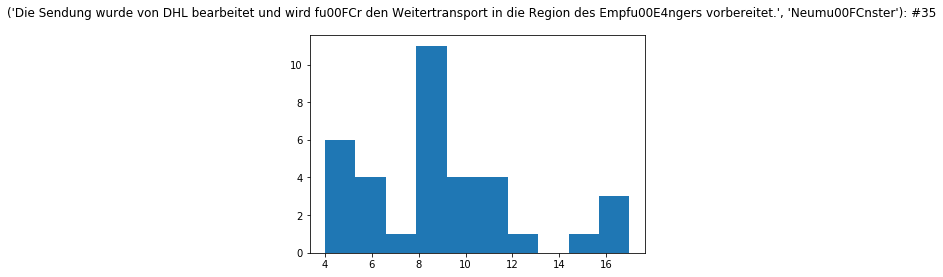

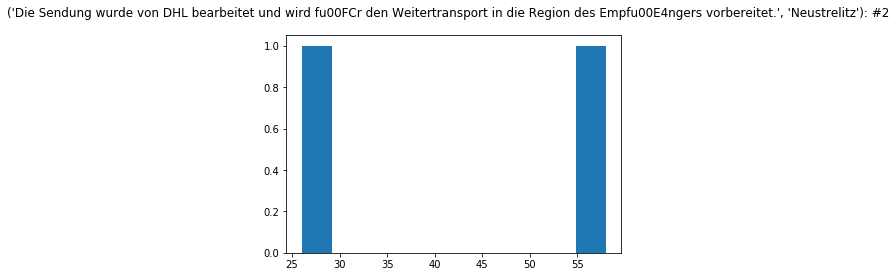

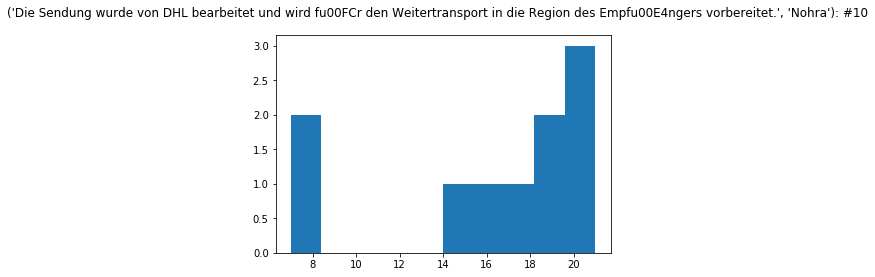

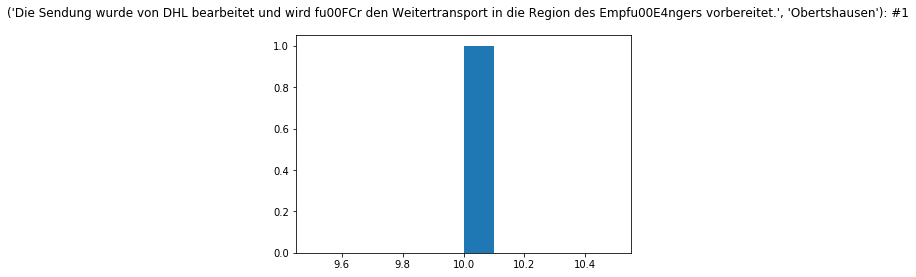

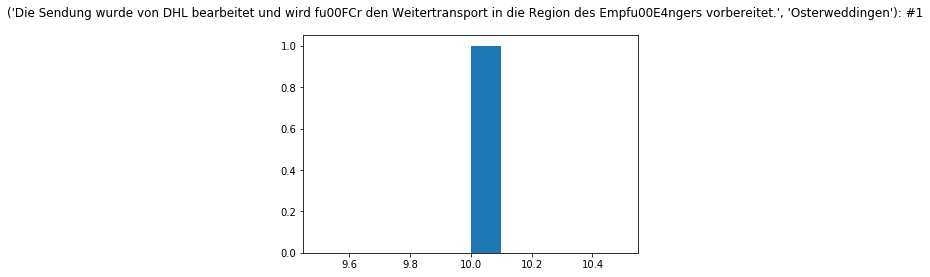

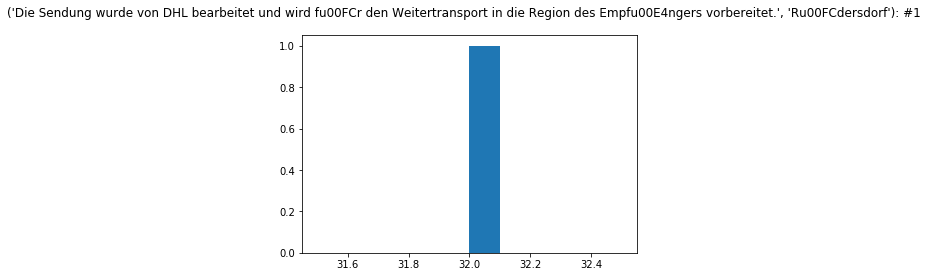

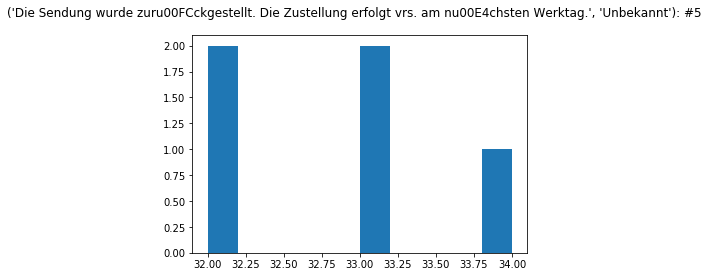

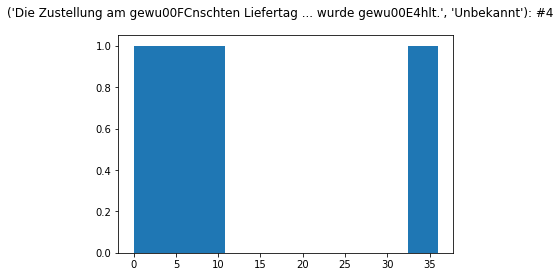

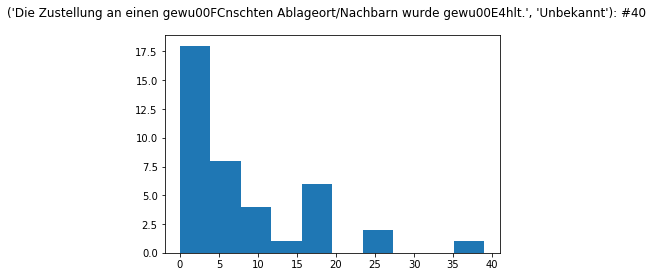

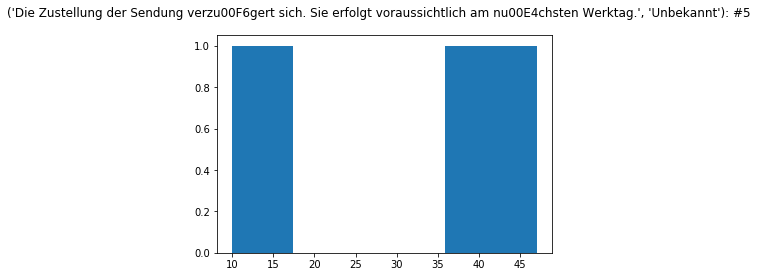

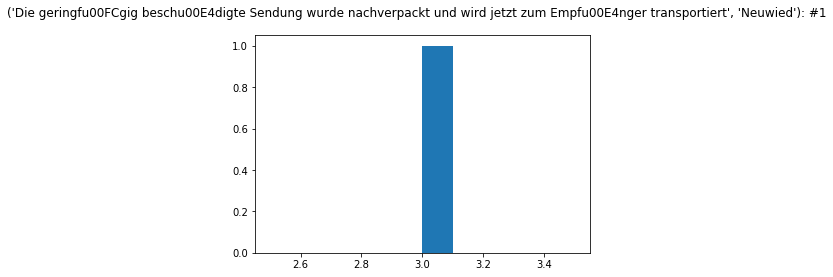

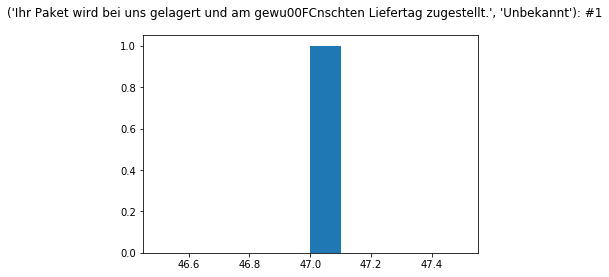

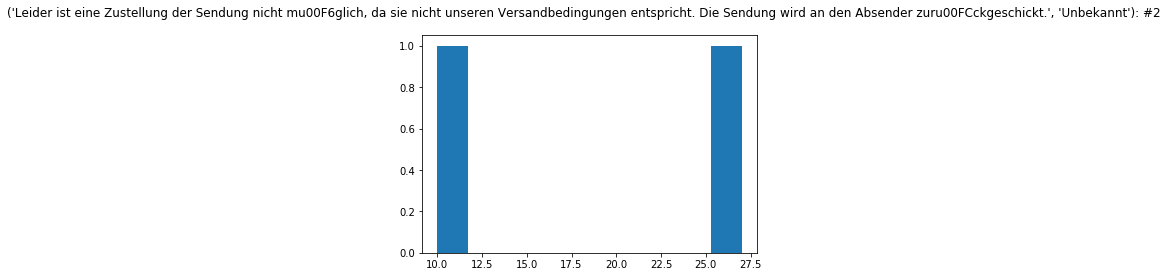

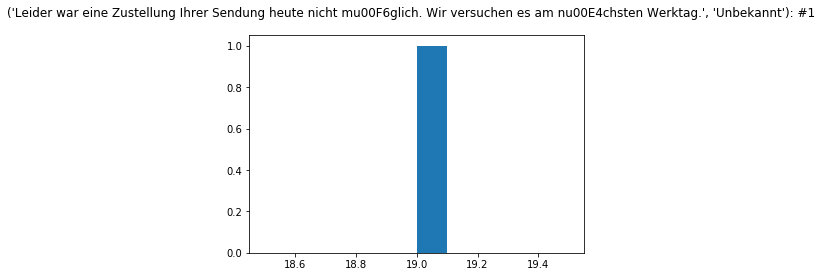

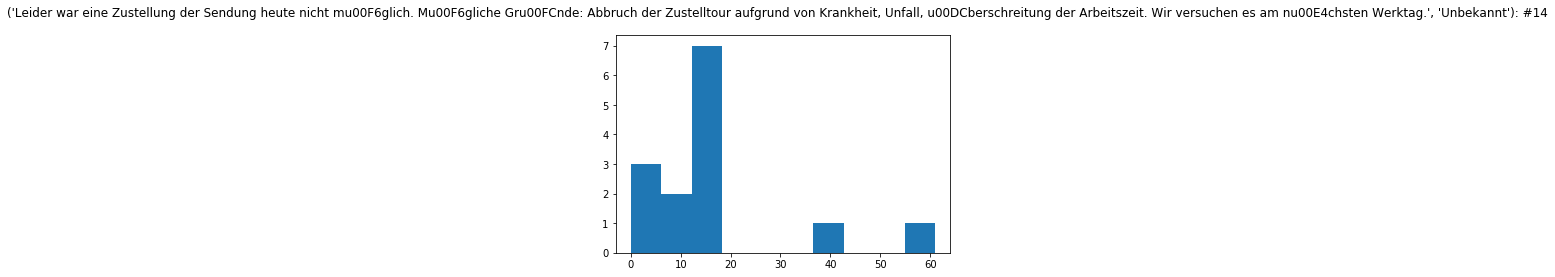

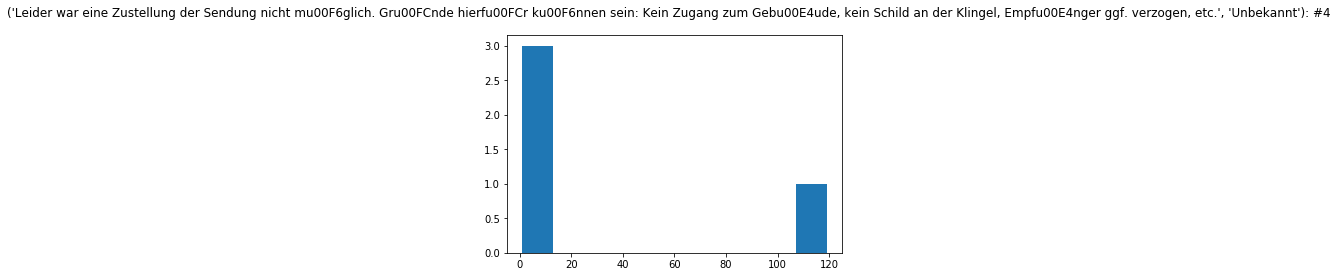

In [49]:
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


grouped = df_temp.groupby(["status", "ort"])

for name, group in grouped:
    fig = plt.figure()
    fig.suptitle(str(name) + ": #{}".format(len(group)))
    matplotlib.pyplot.hist(group.datum_diff_h)
    plt.show()
    
df.drop(columns=["datum_diff_h"], inplace=True)

In [50]:
df.head()

,shipment_number,datum,status,ort,is_final_event,status_next,ort_next,datum_next,datum_diff
0,00340434188193339722,2019-11-29 15:27:00+00:00,Die Sendung wurde elektronisch angeku00FCndigt...,Unbekannt,0.0,Die Sendung wurde von DHL bearbeitet und wird ...,Hamburg,2019-11-30 14:04:00+00:00,0 days 22:37:00
1,00340434188193339722,2019-11-30 14:04:00+00:00,Die Sendung wurde von DHL bearbeitet und wird ...,Hamburg,0.0,Die Sendung ist in der Region des Empfu00E4nge...,Gu00FCnzburg,2019-12-02 21:11:00+00:00,2 days 07:07:00
2,00340434188193339722,2019-12-02 21:11:00+00:00,Die Sendung ist in der Region des Empfu00E4nge...,Gu00FCnzburg,0.0,Die Sendung wurde in das Zustellfahrzeug gelad...,Unbekannt,2019-12-03 08:33:00+00:00,0 days 11:22:00
3,00340434188193339722,2019-12-03 08:33:00+00:00,Die Sendung wurde in das Zustellfahrzeug gelad...,Unbekannt,0.0,Die Sendung wurde erfolgreich zugestellt.,Unbekannt,2019-12-03 11:28:00+00:00,0 days 02:55:00
4,00340434188193339722,2019-12-03 11:28:00+00:00,Die Sendung wurde erfolgreich zugestellt.,Unbekannt,1.0,SuccessDelivery,SuccessDelivery,2019-12-13 00:00:00+00:00,9 days 12:32:00
